# **Učitavanje podataka i potrebnih biblioteka**



In [ ]:
# installing sidetable
!pip install sidetable

In [ ]:
import numpy as np
import pandas as pd
import sidetable as stb
import seaborn as sns
import scipy.stats as stats #
from matplotlib import pyplot as plt
from scipy.stats import spearmanr, pointbiserialr #

import warnings
warnings.filterwarnings('ignore')

In [ ]:
!gdown 14oZhtGL4BWoSHMzUxI6kMO6XDKmBknAx

Downloading...
From: https://drive.google.com/uc?id=14oZhtGL4BWoSHMzUxI6kMO6XDKmBknAx
To: /content/train.csv
100% 122k/122k [00:00<00:00, 74.7MB/s]


In [ ]:
pd.set_option('display.max_columns', None)

# importing training dataset

df = pd.read_csv("train.csv")

# dataset description function

def dataset_description(df):

    feature_descriptions = {
        "battery_power": "Battery capacity (mAh)",
        "blue": "Bluetooth support (1: Yes, 0: No)",
        "clock_speed": "CPU speed in GHz",
        "dual_sim": "Dual SIM support (1: Yes, 0: No)",
        "fc": "Front camera megapixels",
        "four_g": "4G capability (1: Yes, 0: No)",
        "int_memory": "Internal memory (GB)",
        "m_dep": "Mobile depth (cm)",
        "mobile_wt": "Weight of mobile (grams)",
        "n_cores": "Number of processor cores",
        "pc": "Primary camera megapixels",
        "px_height": "Pixel resolution height",
        "px_width": "Pixel resolution width",
        "ram": "RAM (MB)",
        "sc_h": "Screen height (cm)",
        "sc_w": "Screen width (cm)",
        "talk_time": "Battery life (hours)",
        "three_g": "3G capability (1: Yes, 0: No)",
        "touch_screen": "Touch screen (1: Yes, 0: No)",
        "wifi": "WiFi capability (1: Yes, 0: No)",
        "price_range": "Target variable (0: Low, 1: Medium, 2: High, 3: Very High)"
    }

    print("Dataset Shape:", df.shape)
    print("")
    print("""This dataset contains detailed specifications for 2,000 mobile phones.
Each row represents a different mobile device, and each column describes a specific feature of the device.
These features cover hardware characteristics such as battery capacity, memory size, camera quality, screen resolution, and connectivity options.""")
    print("\nFeature Descriptions:\n" + "-"*50)
    for col in df.columns:
        dtype = df[col].dtype
        desc = feature_descriptions.get(col, "No description available")
        print(f"{col} ({dtype}): {desc}")


# **Upoznavanje sa bazom**

In [ ]:
df = pd.read_csv("train.csv")

In [ ]:
df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2   2         20       756  2549     9     7         19   
1        136        3   6        905      1988  2631    17     3          7   
2        145        5   6       1263      1716  2603    11     2          9   
3        131        6   9       1216      1786  2769    16     8         11   
4        141        2  14       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1

In [ ]:
df.tail()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
1995    0.8        106        6  14       1222      1890   668    13     4   
1996    0.2        187        4   3        915      1965  2032    11    10   
1997    0.7        108        8   3        868      1632  3057     9     1   
1998    0.1        145        5   5        336       670   869    18    10   
1999    0.9        168        6  16        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
1995         19        1             1     0            0  
1996         16        1             1     1            2  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3

In [ ]:
dataset_description(df)

Dataset Shape: (2000, 21)

This dataset contains detailed specifications for 2,000 mobile phones.
Each row represents a different mobile device, and each column describes a specific feature of the device.
These features cover hardware characteristics such as battery capacity, memory size, camera quality, screen resolution, and connectivity options.

Feature Descriptions:
--------------------------------------------------
battery_power (int64): Battery capacity (mAh)
blue (int64): Bluetooth support (1: Yes, 0: No)
clock_speed (float64): CPU speed in GHz
dual_sim (int64): Dual SIM support (1: Yes, 0: No)
fc (int64): Front camera megapixels
four_g (int64): 4G capability (1: Yes, 0: No)
int_memory (int64): Internal memory (GB)
m_dep (float64): Mobile depth (cm)
mobile_wt (int64): Weight of mobile (grams)
n_cores (int64): Number of processor cores
pc (int64): Primary camera megapixels
px_height (int64): Pixel resolution height
px_width (int64): Pixel resolution width
ram (int64): RAM (MB)
s

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
df.describe(include="all") # df.describe(include="O"), there are no features with "object" datatype

# Ovaj skup podataka je pomalo zastario, jer nema telefona sa internom memorijom vecom od 64GB, 4GB RAM-a i podrskom za 5G...
# Vjerovatno postoje i telefoni bez prednje kamere (min_fc = 0)
# Postoji uzorak sa visinom od 0 piksela, sto ne bi trebalo da bude moguce
# Takodje postoji i neuobicajen uzorak sa vrijednoscu 0 za sirinu ekrana – nema smisla da telefon ima sirinu 0

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      0.521500    32.046500     0.501750   140.249000     4.520500   
std       0.499662    18.145715     0.288416    35.399655     2.287837   
min       0.000000     2.000000     0.100000    80.000000     1.000000   
25%       0.000000    16.000000     0.200000   109.000000     3.000000   
50%       1.000000    32.000000     0.500000   141.000000     4.000000   
75%       1.000000    48.000000     0.800000   170.000000     7.000000   
max       1.000000    64.000000     1.000000   200.000000     8.000000   

                pc    px_height     px_width          ram         sc_h  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      9.916500   645.108000  1251.515500  2124.213000    12.306500   
std       6.064315   443.780811   432.199447  1084.732044     4.213245   
min       0.000000     0.000000   500.000000   256.000000     5.000000   
25%       5.000000   282.750000   874.750000  1207.500000     9.000000   
50%      10.000000   564.000000  1247.000000  2146.500000    12.000000   
75%      15.000000   947.250000  1633.000000  3064.500000    16.000000   
max      20.000000  1960.000000  1998.000000  3998.000000    19.000000   

              sc_w    talk_time      three_g  touch_screen         wifi  \
count  2000.000000  2000.000000  2000.000000   2000.000000  2000.000000   
mean      5.767000    11.011000     0.761500      0.503000     0.507000   
std       4.356398     5.463955     0.426273      0.500116     0.500076   
min       0.000000     2.000000     0.000000      0.000000     0.000000   
25%       2.000000     6.000000     1.000000      0.000000     0.000000   
50%       5.000000    11.000000     1.000000      1.000000     1.000000   
75%       9.000000    16.000000     1.000000      1.000000     1.000000   
max      18.000000    20.000000     1.000000      1.000000     1.000000   

       price_range  
count  2000.000000  
mean      1.500000  
std       1.118314  
min       0.000000  
25%       0.750000  
50%       1.500000  
75%       2.250000  
max       3.000000

In [ ]:
# Broj duplikata
df.duplicated().sum()

np.int64(0)

In [ ]:
# Broj nevalidnih vrijednosti, alternativa -> df.count()
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
# Broj jedinstvenih vrijednosti za svako obiljezje
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [ ]:
for feature in df.columns:
  if (df[feature].nunique() < 64):
    print(f"Feature {feature} has {df[feature].nunique()} unique values:\n{df[feature].unique()}\n")

Feature blue has 2 unique values:
[0 1]

Feature clock_speed has 26 unique values:
[2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7]

Feature dual_sim has 2 unique values:
[0 1]

Feature fc has 20 unique values:
[ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]

Feature four_g has 2 unique values:
[0 1]

Feature int_memory has 63 unique values:
[ 7 53 41 10 44 22 24  9 33 17 52 46 13 23 49 19 39 47 38  8 57 51 21  5
 60 61  6 11 50 34 20 27 42 40 64 14 63 43 16 48 12 55 36 30 45 29 58 25
  3 54 15 37 31 32  4 18  2 56 26 35 59 28 62]

Feature m_dep has 10 unique values:
[0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]

Feature n_cores has 8 unique values:
[2 3 5 6 1 8 4 7]

Feature pc has 21 unique values:
[ 2  6  9 14  7 10  0 15  1 18 17 11 16  4 20 13  3 19  8  5 12]

Feature sc_h has 15 unique values:
[ 9 17 11 16  8 13 19  5 14 18  7 10 12  6 15]

Feature sc_w has 19 unique values:
[ 7  3  2  8  1 10  9  0 15 13  5 11  

# **Raspodjele**

Categorical and numerical features

In [ ]:
cat_feats_eda = ["blue","dual_sim","four_g","n_cores","three_g","touch_screen","wifi","price_range"]
num_feats_eda = ["battery_power", "clock_speed", "fc", "int_memory", "m_dep", "mobile_wt", "pc", "px_height", "px_width", "ram", "talk_time", "sc_h", "sc_w"]
print(f"Number of categorical features : {len(cat_feats_eda)} -> {cat_feats_eda}\nNumber of numerical features {len(num_feats_eda)} -> {num_feats_eda}")

Number of categorical features : 8 -> ['blue', 'dual_sim', 'four_g', 'n_cores', 'three_g', 'touch_screen', 'wifi', 'price_range']
Number of numerical features 13 -> ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'talk_time', 'sc_h', 'sc_w']


In [ ]:
for cat_feat in cat_feats_eda:
  print(f"|{cat_feat}| has {df[cat_feat].nunique()} unique values -> {df[cat_feat].unique()}")
  print(f"{df[cat_feat].value_counts()}")
  print("-"*50)

|blue| has 2 unique values -> [0 1]
blue
0    1010
1     990
Name: count, dtype: int64
--------------------------------------------------
|dual_sim| has 2 unique values -> [0 1]
dual_sim
1    1019
0     981
Name: count, dtype: int64
--------------------------------------------------
|four_g| has 2 unique values -> [0 1]
four_g
1    1043
0     957
Name: count, dtype: int64
--------------------------------------------------
|n_cores| has 8 unique values -> [2 3 5 6 1 8 4 7]
n_cores
4    274
7    259
8    256
2    247
3    246
5    246
1    242
6    230
Name: count, dtype: int64
--------------------------------------------------
|three_g| has 2 unique values -> [0 1]
three_g
1    1523
0     477
Name: count, dtype: int64
--------------------------------------------------
|touch_screen| has 2 unique values -> [0 1]
touch_screen
1    1006
0     994
Name: count, dtype: int64
--------------------------------------------------
|wifi| has 2 unique values -> [1 0]
wifi
1    1014
0     986
Name: c

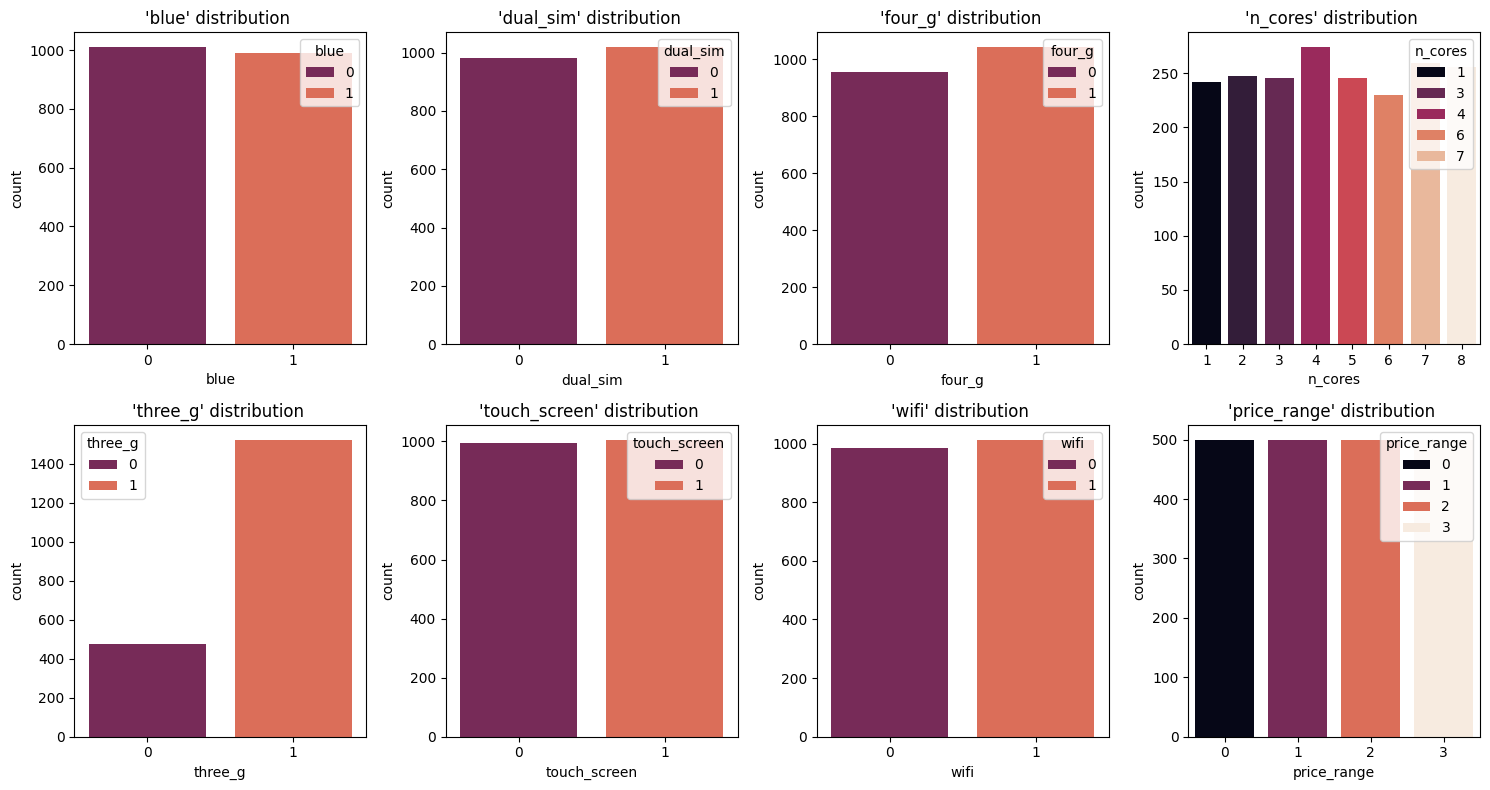

In [ ]:
plt.figure(figsize=(15,8))
for i,feature in enumerate(cat_feats_eda,1):
  plt.subplot(2,4,i)
  sns.countplot(data=df,x=feature,palette="rocket",hue=feature)
  plt.title(f"'{feature}' distribution ")
plt.tight_layout()
plt.show()

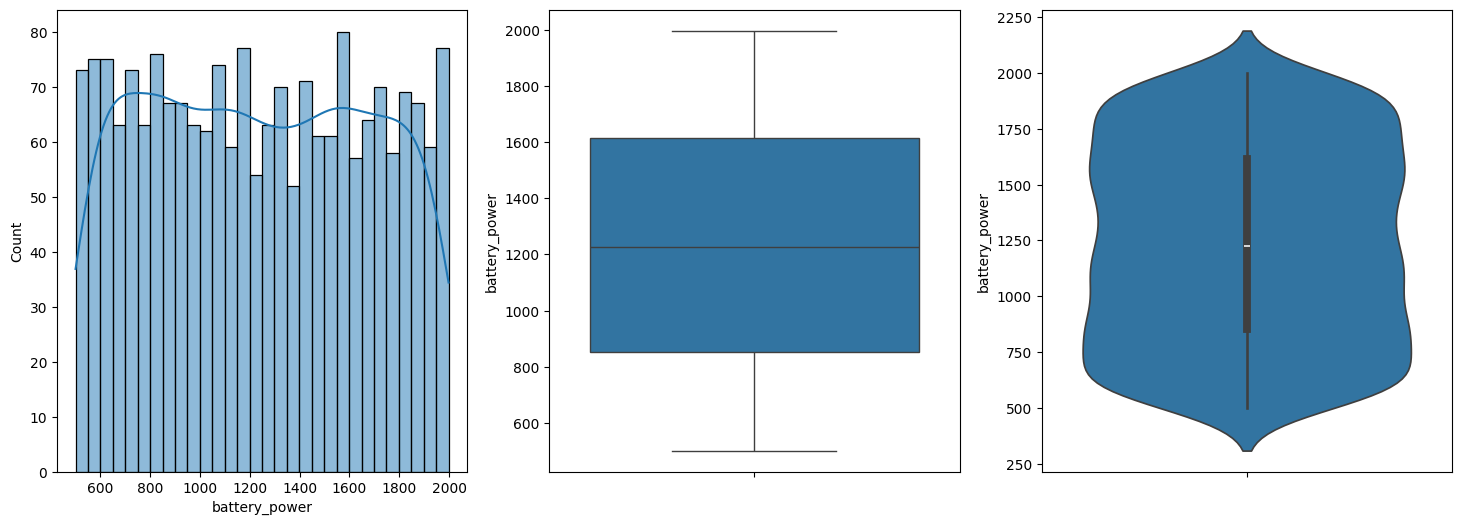

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
sns.histplot(data=df,x="battery_power",bins=30,kde=True,stat="count")
plt.subplot(1,3,2)
sns.boxplot(data=df["battery_power"])
plt.subplot(1,3,3)
sns.violinplot(data=df["battery_power"])
plt.show()
plt.tight_layout()

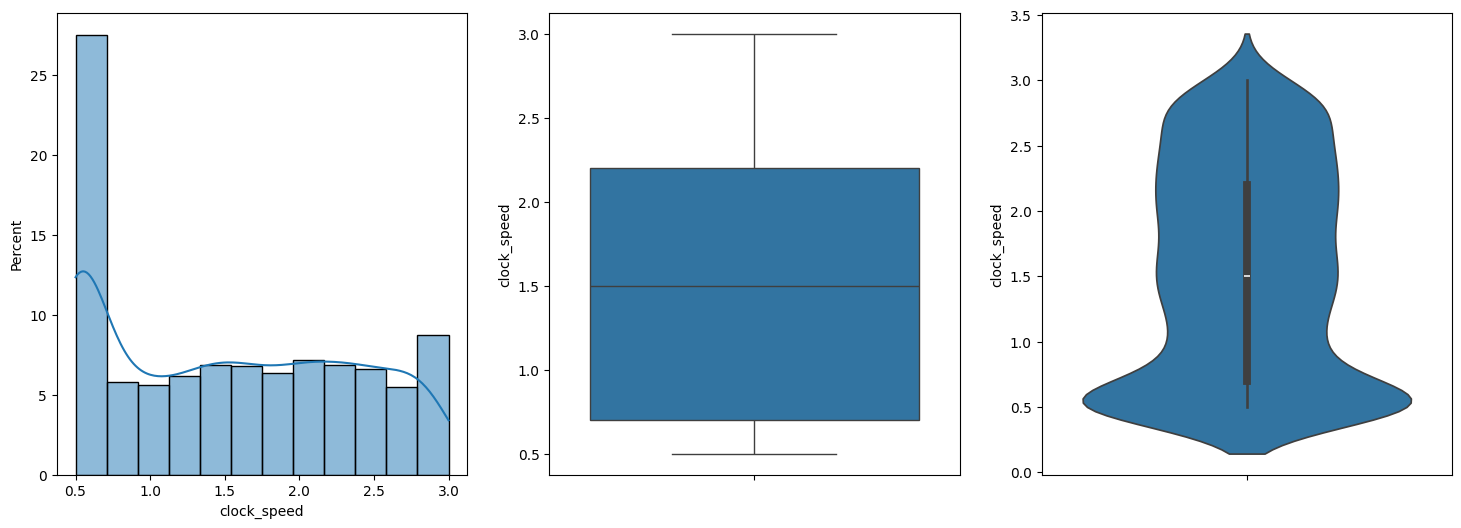

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
sns.histplot(data=df,x="clock_speed",kde=True,stat="percent")
plt.subplot(1,3,2)
sns.boxplot(data=df["clock_speed"])
plt.subplot(1,3,3)
sns.violinplot(data=df["clock_speed"])
plt.show()
plt.tight_layout()

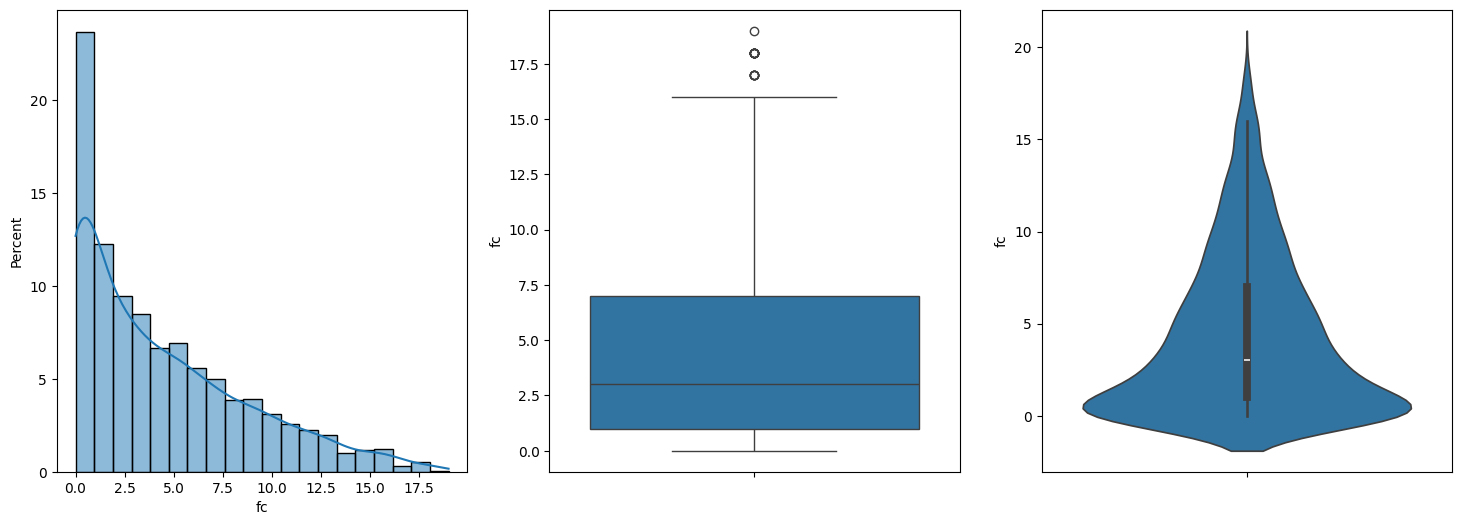

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
sns.histplot(data=df,x="fc",kde=True,stat="percent")
plt.subplot(1,3,2)
sns.boxplot(data=df["fc"])
plt.subplot(1,3,3)
sns.violinplot(data=df["fc"])
plt.show()
plt.tight_layout()

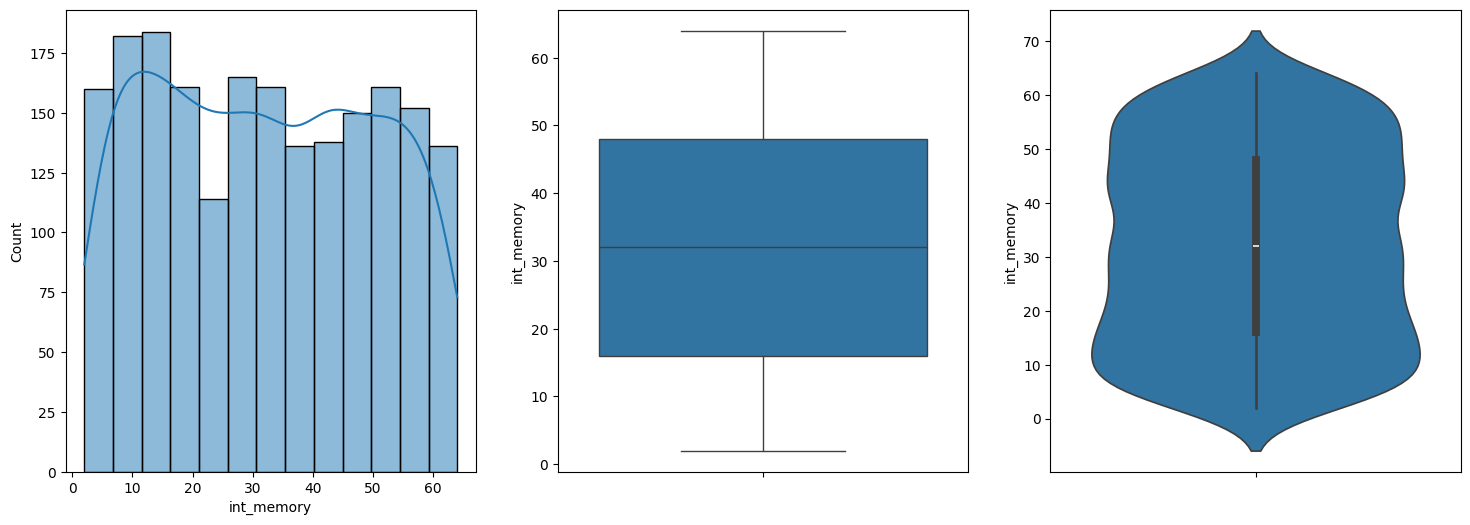

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
sns.histplot(data=df,x="int_memory",kde=True,stat="count")
plt.subplot(1,3,2)
sns.boxplot(data=df["int_memory"])
plt.subplot(1,3,3)
sns.violinplot(data=df["int_memory"])
plt.show()
plt.tight_layout()

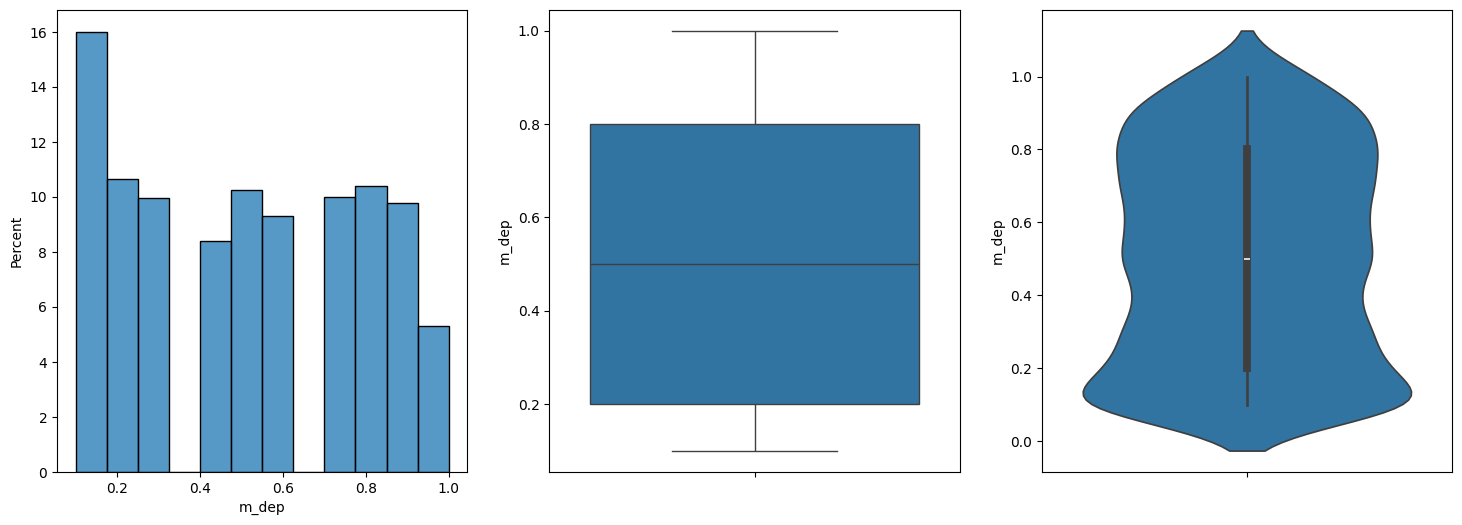

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
sns.histplot(data=df,x="m_dep",stat="percent")
plt.subplot(1,3,2)
sns.boxplot(data=df["m_dep"])
plt.subplot(1,3,3)
sns.violinplot(data=df["m_dep"])
plt.show()
plt.tight_layout()

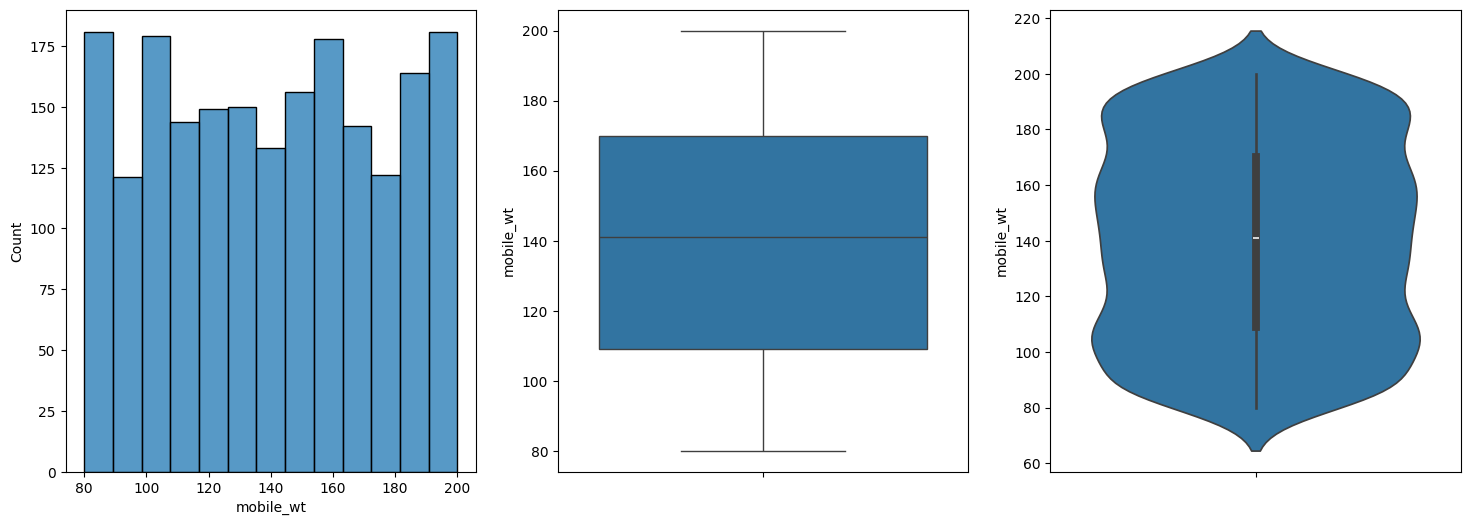

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
sns.histplot(data=df,x="mobile_wt",stat="count")
plt.subplot(1,3,2)
sns.boxplot(data=df["mobile_wt"])
plt.subplot(1,3,3)
sns.violinplot(data=df["mobile_wt"])
plt.show()
plt.tight_layout()

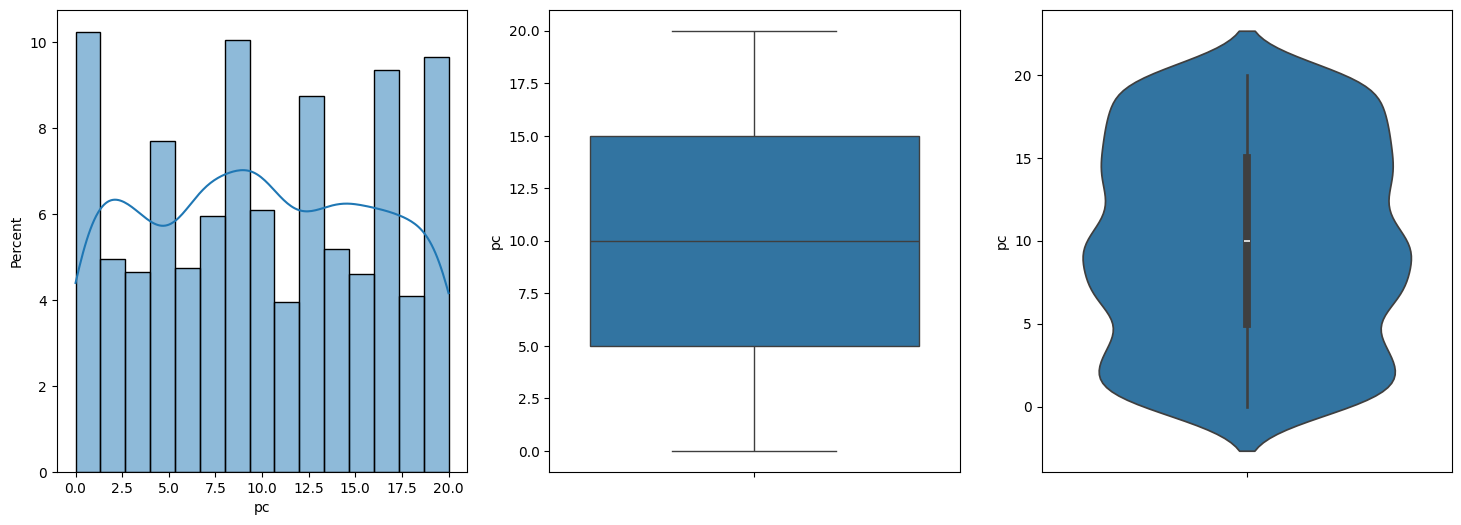

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
sns.histplot(data=df,x="pc",stat="percent",kde=True,bins=15)
plt.subplot(1,3,2)
sns.boxplot(data=df["pc"])
plt.subplot(1,3,3)
sns.violinplot(data=df["pc"])
plt.show()
plt.tight_layout()

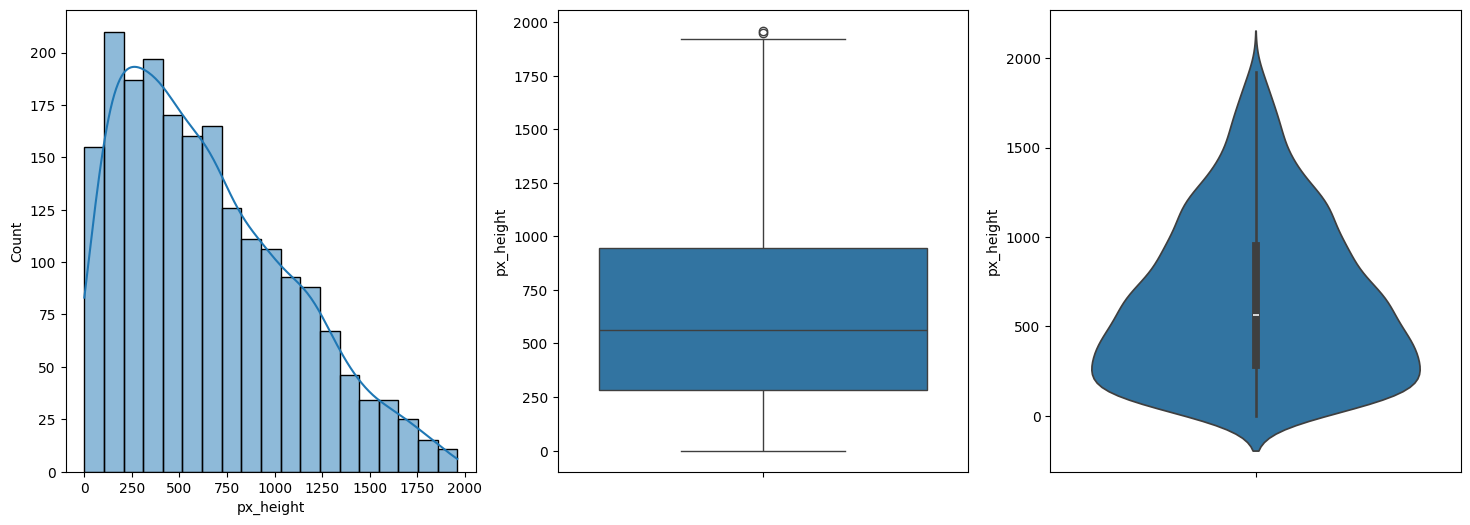

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
sns.histplot(data=df,x="px_height",stat="count",kde=True)
plt.subplot(1,3,2)
sns.boxplot(data=df["px_height"])
plt.subplot(1,3,3)
sns.violinplot(data=df["px_height"])
plt.show()
plt.tight_layout()

#

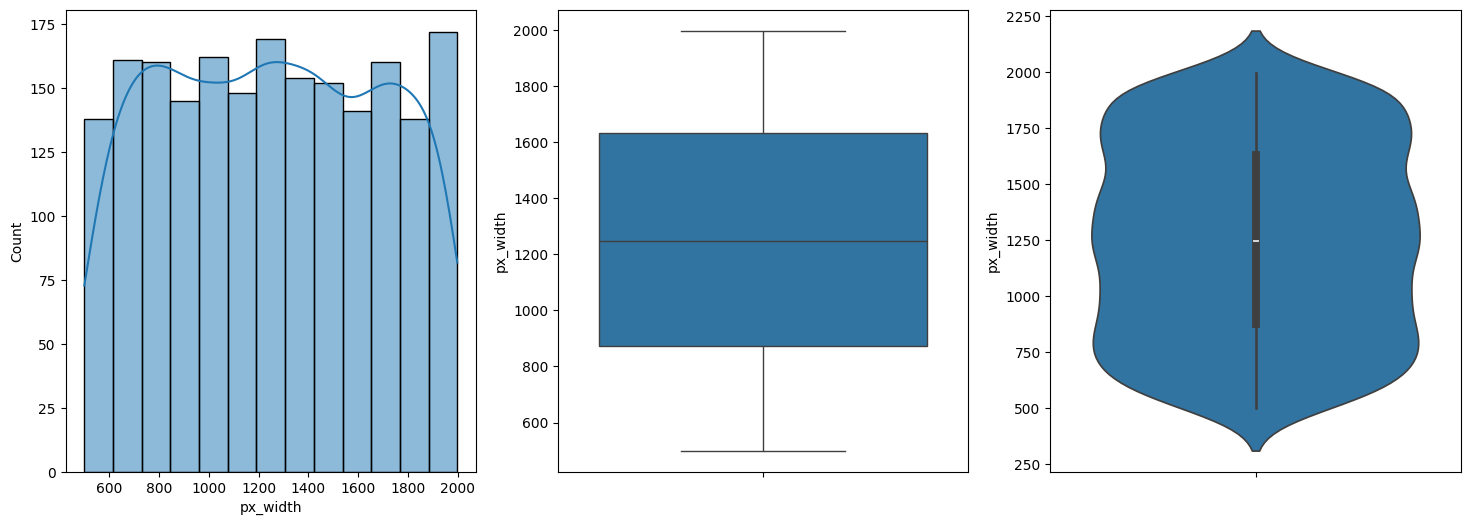

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
sns.histplot(data=df,x="px_width",stat="count",kde=True)
plt.subplot(1,3,2)
sns.boxplot(data=df["px_width"])
plt.subplot(1,3,3)
sns.violinplot(data=df["px_width"])
plt.show()
plt.tight_layout()

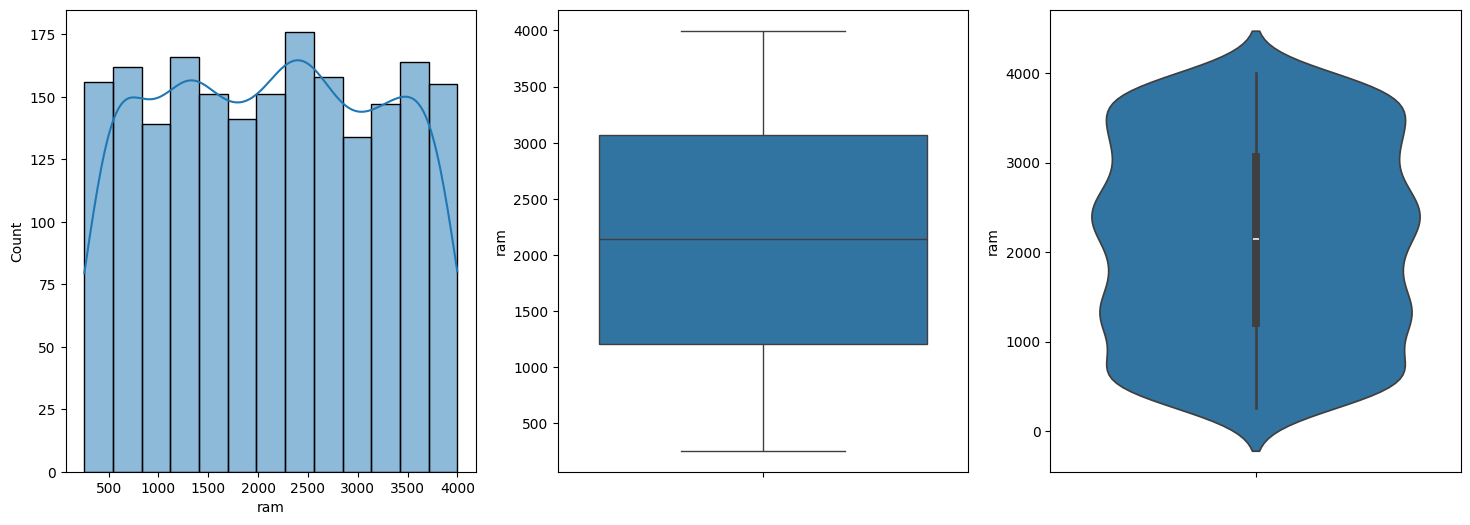

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
sns.histplot(data=df,x="ram",stat="count",kde=True)
plt.subplot(1,3,2)
sns.boxplot(data=df["ram"])
plt.subplot(1,3,3)
sns.violinplot(data=df["ram"])
plt.show()
plt.tight_layout()

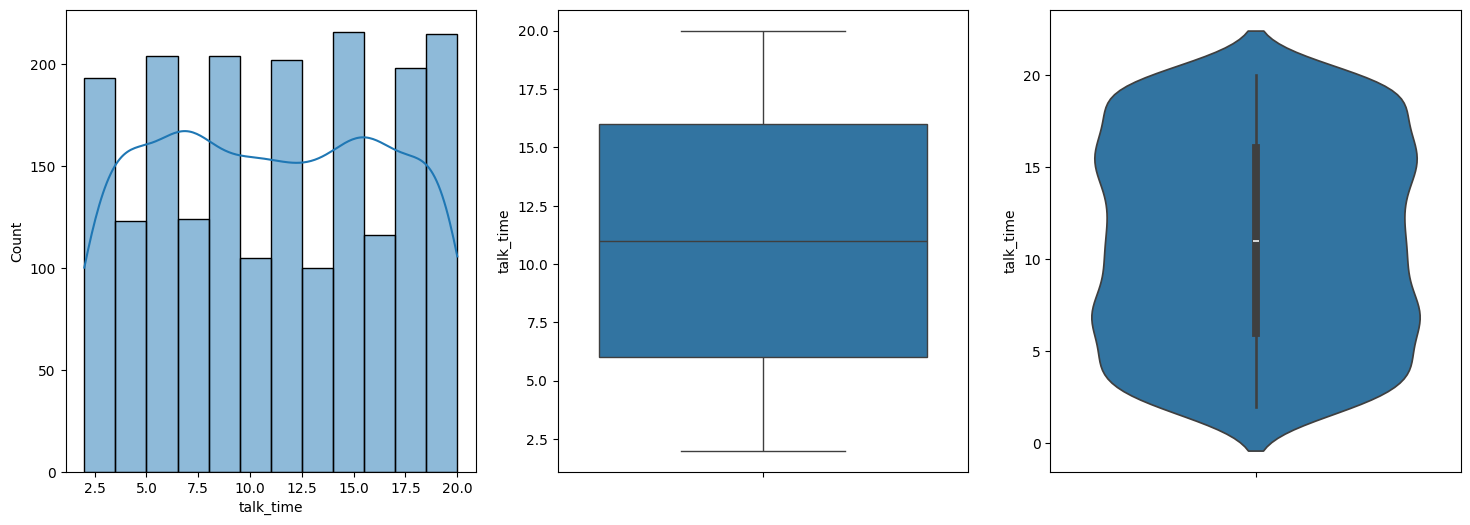

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
sns.histplot(data=df,x="talk_time",stat="count",kde=True)
plt.subplot(1,3,2)
sns.boxplot(data=df["talk_time"])
plt.subplot(1,3,3)
sns.violinplot(data=df["talk_time"])
plt.show()
plt.tight_layout()

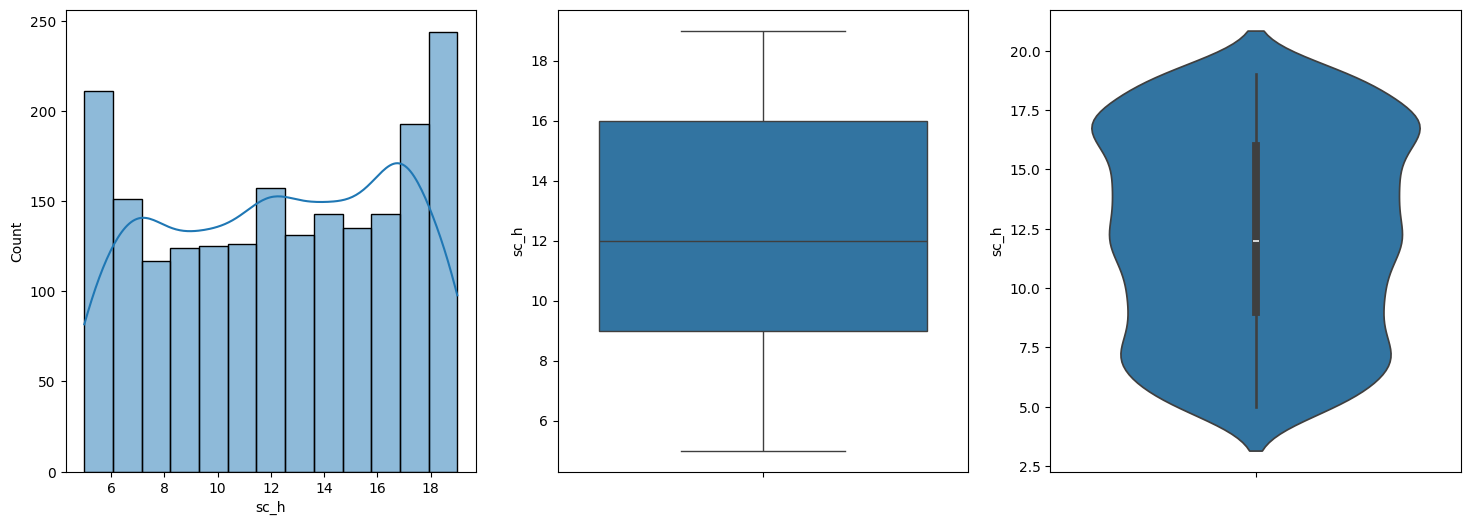

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
sns.histplot(data=df,x="sc_h",stat="count",kde=True)
plt.subplot(1,3,2)
sns.boxplot(data=df["sc_h"])
plt.subplot(1,3,3)
sns.violinplot(data=df["sc_h"])
plt.show()
plt.tight_layout()

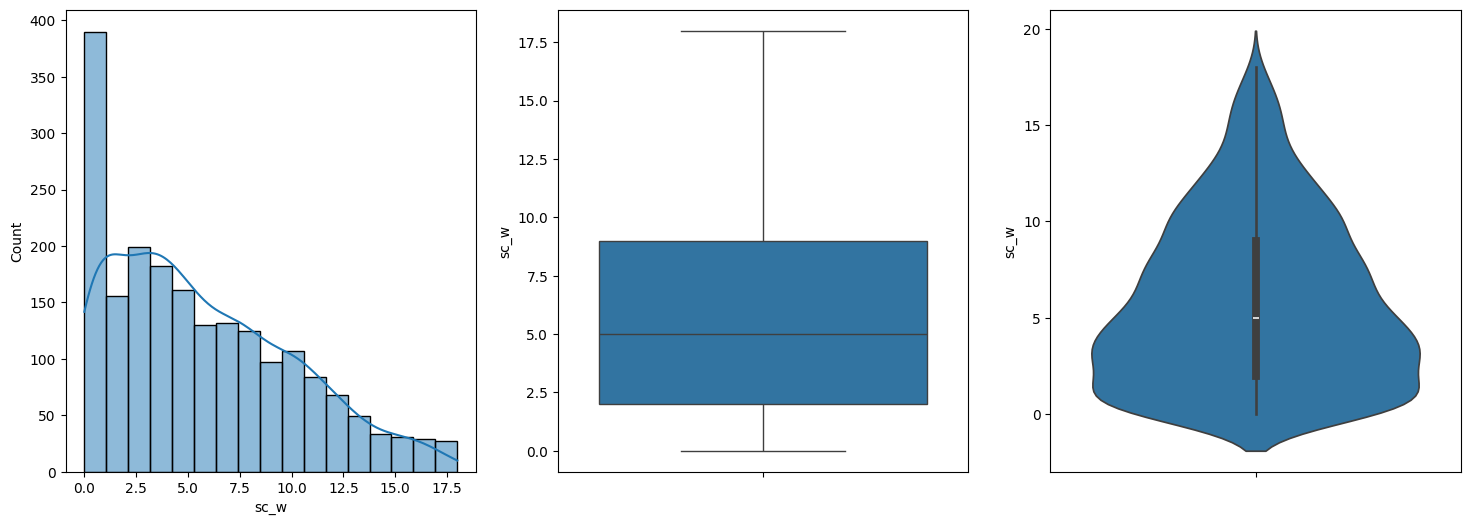

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
sns.histplot(data=df,x="sc_w",stat="count",kde=True)
plt.subplot(1,3,2)
sns.boxplot(data=df["sc_w"])
plt.subplot(1,3,3)
sns.violinplot(data=df["sc_w"])
plt.show()
plt.tight_layout()

## Detekcija outlier-a

In [ ]:
# Izgleda da postoje neki izuzeci u fc i px_height obiljezju

df_description = df.describe()
fc_Q1 =  df_description['fc']['25%']
fc_Q3 = df_description['fc']['75%']
fc_IQR = fc_Q3 - fc_Q1

upper = fc_Q3 + (1.5 * fc_IQR)
lower = fc_Q1 - (1.5 * fc_IQR)

fc_outliers =  df[(df['fc'] < lower) | (df['fc']> upper)]
fc_outliers

# Postoji 18 telefona koji imaju izuzetke za prednju kameru

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
95             1137     1          1.0         0  18       0           7   
169            1569     0          2.8         1  17       0          44   
226            1708     1          2.4         1  18       1          49   
229            1689     0          1.8         0  17       0          24   
300            1937     1          1.7         0  17       0          58   
305            1348     0          2.0         0  18       0          52   
372            1703     1          1.5         1  17       1          55   
584             946     1          2.6         1  17       0           5   
1387           1533     1          1.1         1  18       1          17   
1406           1731     1          2.3         1  18       0          60   
1416           1448     0          0.5         1  18       0           2   
1549           1772     1          1.6         0  17       1          45   
1554           1957     0          1.2         1  18       1          36   
1693            695     0          0.5         0  18       1          12   
1705           1290     1          1.4         1  19       1          35   
1880           1720     0          1.6         0  18       1           2   
1882            591     0          2.1         1  18       1          16   
1888           1544     0          2.4         0  18       1          12   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
95      1.0        196        3  19        942      1179  3616    13     5   
169     0.3        110        4  20         45      1942  1260     9     2   
226     0.1        109        1  19        233       517  3388     6     4   
229     0.3        127        3  18        954      1200  2766     7     2   
300     0.6        189        1  19       1728      1767  3321     5     4   
305     0.3         98        3  20       1869      1942   955    18    11   
372     0.7        138        5  19       1411      1711  2993     5     1   
584     0.1        166        3  20       1698      1771  3720    15     7   
1387    0.3        160        4  20       1054      1393  2520     8     2   
1406    0.5        171        4  20        142      1039  1220     9     3   
1416    0.2        100        5  19        846      1144   593     9     4   
1549    0.5        159        2  18        837      1405  1146     6     1   
1554    0.8        151        2  19       1194      1727  1115    16     2   
1693    0.6        196        2  19       1649      1829  2855    16    13   
1705    0.3        110        4  20        405       742   879    16     2   
1880    0.8        188        5  20        334       896  2522    10     5   
1882    0.5        196        7  20        952      1726   704    14     5   
1888    0.1        186        7  20        470       844   489     9     4   

      talk_time  three_g  touch_screen  wifi  price_range  
95           12        1             1     1            3  
169          17        1             0     0            1  
226          16        1             1     1            3  
229           7        0             1     1            3  
300          14        1             1     0            3  
305           7        1             1     1            1  
372          20        1             1     1            3  
584           4        0             1     0            3  
1387         11        1             0     1            2  
1406         20        0             1     0            1  
1416         18        1             1     1            0  
1549         17        1             1     0            1  
1554         18        1             0     1            1  
1693          7        1             1     1            2  
1705          8        1             0     0            0  
1880          2        1             0     1            2  
1882          4        1             1     1            0 

In [ ]:
px_height_Q1 =  df_description['px_height']['25%']
px_height_Q3 = df_description['px_height']['75%']
px_height_IQR = px_height_Q3 - px_height_Q1

upper_px_height = px_height_Q3 + (1.5 * px_height_IQR)
lower_px_height = px_height_Q1 - (1.5 * px_height_IQR)

px_height_outliers =  df[(df['px_height'] < lower_px_height) | (df['px_height']> upper_px_height)]
px_height_outliers

# Postoje samo 2 telefona sa odudarajucim vrijednostima za px_height

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
988            1413     1          0.5         1   4       1          45   
1771           1230     1          1.6         0   0       1          48   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
988     0.4        104        5   6       1949      1994  2973    17     8   
1771    0.7        111        7   2       1960      1963  1622    18    17   

      talk_time  three_g  touch_screen  wifi  price_range  
988          15        1             0     1            3  
1771         16        1             1     1            2

In [ ]:
# Ukupan broj izuzetaka

total_outliers = len(fc_outliers) + len(px_height_outliers)
print(f"total outliers of fc : {len(fc_outliers)}")
print(f"total outliers of px_height: {len(px_height_outliers)}" )
print(f"total percentage of outliers: {round((total_outliers / len(df))*100,2)}%")

# Procenat izuzetaka je oko 1% cijelog skupa podataka, pa se necemo previse brinuti zbog toga jer vjerovatno nece uticati na proces analize

total outliers of fc : 18
total outliers of px_height: 2
total percentage of outliers: 1.0%


In [ ]:
# Nasumicne vrijednosti

df[df['px_height'] == 0]

# Grupisacemo podatke po rasponu cijena i zamijeniti vrijednost 0 u px_height sa prosjekom px_height za odgovarajuci raspon cijena

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1481           1834     0          2.1         0   7       1          40   
1933            897     1          2.0         0   3       1           2   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
1481    0.1         99        4  11          0      1987  3692    13     0   
1933    0.6        154        8  10          0       994  1958     7     5   

      talk_time  three_g  touch_screen  wifi  price_range  
1481         16        1             1     0            3  
1933          7        1             1     0            1

In [ ]:
df.groupby('price_range')['px_height'].mean()

price_range
0    536.408
1    666.892
2    632.284
3    744.848
Name: px_height, dtype: float64

In [ ]:
df['px_height'] = df['px_height'].replace(0, np.nan)

# Indeksi reda sa null vrijednostima su
# 1481
# 1933

In [ ]:
df['px_height'] = df['px_height'].fillna(df.groupby('price_range')['px_height'].transform('mean'))

In [ ]:
df[df['px_height'] == 0]

Empty DataFrame
Columns: [battery_power, blue, clock_speed, dual_sim, fc, four_g, int_memory, m_dep, mobile_wt, n_cores, pc, px_height, px_width, ram, sc_h, sc_w, talk_time, three_g, touch_screen, wifi, price_range]
Index: []

In [ ]:
df[df['sc_w'] == 0]

# Ovo je skoro 10% podataka koji imaju nasumicne vrijednosti, pa cemo ih popuniti prosjecnom sirinom ekrana telefona da zamijenimo vrijednost 0
# Grupisacemo podatke po rasponu cijena i popuniti ih na osnovu prosjecne velicine ekrana za taj raspon cijena

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
12             1815     0          2.8         0   2       0          33   
24              503     0          1.2         1   5       1           8   
33             1310     1          2.2         1   0       1          51   
42             1253     1          0.5         1   5       1           5   
50             1547     1          3.0         1   2       1          14   
...             ...   ...          ...       ...  ..     ...         ...   
1918            772     0          1.0         1   0       1          23   
1920            591     1          0.5         1   1       1          16   
1946            590     1          1.2         1   0       0          32   
1954            686     1          2.7         1   0       0          36   
1981           1454     0          2.6         0   8       0           6   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
12      0.6        159        4  17      607.0       748  1482    18     0   
24      0.4        111        3  13      201.0      1245  2583    11     0   
33      0.6        100        4   0      178.0      1919  3845     7     0   
42      0.2        152        2  19      685.0       714  1878    15     0   
50      0.7        198        3  19     1042.0      1832  2059     5     0   
...     ...        ...      ...  ..        ...       ...   ...   ...   ...   
1918    0.6         97        7  11      317.0      1805  2782     7     0   
1920    0.9         90        6  17      892.0      1603  3746     5     0   
1946    0.4        141        6   1      227.0       509  1817    10     0   
1954    0.1        194        4   1       64.0       745  1503    10     0   
1981    0.4        199        3  20      698.0      1018  1300    10     0   

      talk_time  three_g  touch_screen  wifi  price_range  
12            2        1             0     0            1  
24           12        1             0     0            1  
33           12        1             1     0            3  
42            4        1             1     0            1  
50           15        1             0     1            2  
...         ...      ...           ...   ...          ...  
1918         17        1             0     0            2  
1920          5        1             1     0            3  
1946          6        0             1     0            0  
1954         13        0             0     0            0  
1981          2        0             0     1            1  

[180 rows x 21 columns]

In [ ]:
df.groupby('price_range')['sc_w'].mean()

# Ovo je prosjek za svaki raspon cijena, zamijenicemo vrijednost 0 u sc_w na osnovu njihovog raspona cijena
# Indeksi za provjeru nakon popunjavanja su 33, 42, 50, 1954

price_range
0    5.682
1    5.544
2    5.714
3    6.128
Name: sc_w, dtype: float64

In [ ]:
df['sc_w'] = df['sc_w'].replace(0, np.nan)

In [ ]:
df['sc_w'] = df['sc_w'].fillna(df.groupby('price_range')['sc_w'].transform('mean'))

In [ ]:
df[df['sc_w'] == 0]

# Sada sirina ekrana vise nema vrijednosti 0

Empty DataFrame
Columns: [battery_power, blue, clock_speed, dual_sim, fc, four_g, int_memory, m_dep, mobile_wt, n_cores, pc, px_height, px_width, ram, sc_h, sc_w, talk_time, three_g, touch_screen, wifi, price_range]
Index: []

In [ ]:
df[df['px_height'] < 200]

# Visine ekrana u pikselima ispod 200 su neuobicajno niske.
# Cak i nakon ciscenja vrijednosti 0, minimalna px_width ≈ 600, minimalna px_height = 1 — djeluje sumnjivo.
# Stari telefoni poput Nokie 230 imali su 240×320 px i 16MB RAM-a.
# Telefoni ovdje sa 2GB+ RAM-a na tako niskim rezolucijama djeluju nerealno.
# StackOverflow navodi da je najniza rezolucija smartphone ekrana obicno 240×320 px.
# https://stackoverflow.com/questions/34035799/what-is-the-lowest-screen-resolution-for-a-smartphone

# Primjeri (gsmArena)

#| Phone                              | RAM     | Resolution   | Height (portrait) | Type                      |
#| ---------------------------------- | ------- | ------------ | ----------------- | ------------------------- |
#| **Nokia 8110 4G**                  | 256MB   | 320 × 240 px | **320 px**        | KaiOS smart feature phone |
#| **JioPhone (1st gen)**             | 256MB   | 320 × 240 px | **320 px**        | KaiOS feature phone       |
#| **Samsung GT-S5300 Galaxy Pocket** | 289MB\* | 240 × 320 px | **320 px**        | Android smartphone        |
#| **Alcatel OneTouch 4033**          | 256MB   | 320 × 480 px | **480 px**        | Android smartphone        |



battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
11             1520     1          2.2         0   5       1          33   
28             1453     0          1.6         1  12       1          52   
32             1319     1          0.9         0   3       1          41   
33             1310     1          2.2         1   0       1          51   
...             ...   ...          ...       ...  ..     ...         ...   
1963           1906     1          1.9         1   3       0          55   
1965            659     0          1.4         1   2       1           3   
1972           1191     0          0.8         0   6       1          46   
1979           1614     0          1.2         0   1       1           9   
1991           1882     0          2.0         0  11       1          44   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  \
0       0.6        188        2   2       20.0       756  2549     9   
11      0.5        177        8  18      151.0      1005  3826    14   
28      0.3         96        2  18      187.0      1311  2373    10   
32      0.9        107        1  18       85.0      1152  2227    18   
33      0.6        100        4   0      178.0      1919  3845     7   
...     ...        ...      ...  ..        ...       ...   ...   ...   
1963    0.2        113        3   4        3.0       629  1871    13   
1965    0.1         85        8   6      190.0       657   967    10   
1972    0.8         89        6   9       42.0       807   824    19   
1979    0.1        161        3   2      173.0      1219  1832    15   
1991    0.8        113        8  19        4.0       743  3579    19   

           sc_w  talk_time  three_g  touch_screen  wifi  price_range  
0      7.000000         19        0             0     1            1  
11     9.000000         13        1             1     1            3  
28     1.000000         10        1             1     1            2  
32     5.000000          3        1             1     1            1  
33     6.646421         12        1             1     0            3  
...         ...        ...      ...           ...   ...          ...  
1963   5.000000          4        1             0     1            1  
1965   1.000000         14        1             0     1            0  
1972  18.000000          7        1             0     0            0  
1979   8.000000         11        1             0     0            1  
1991   8.000000         20        1             1     0            3  

[345 rows x 21 columns]

## Grafik rezolucija ekrana

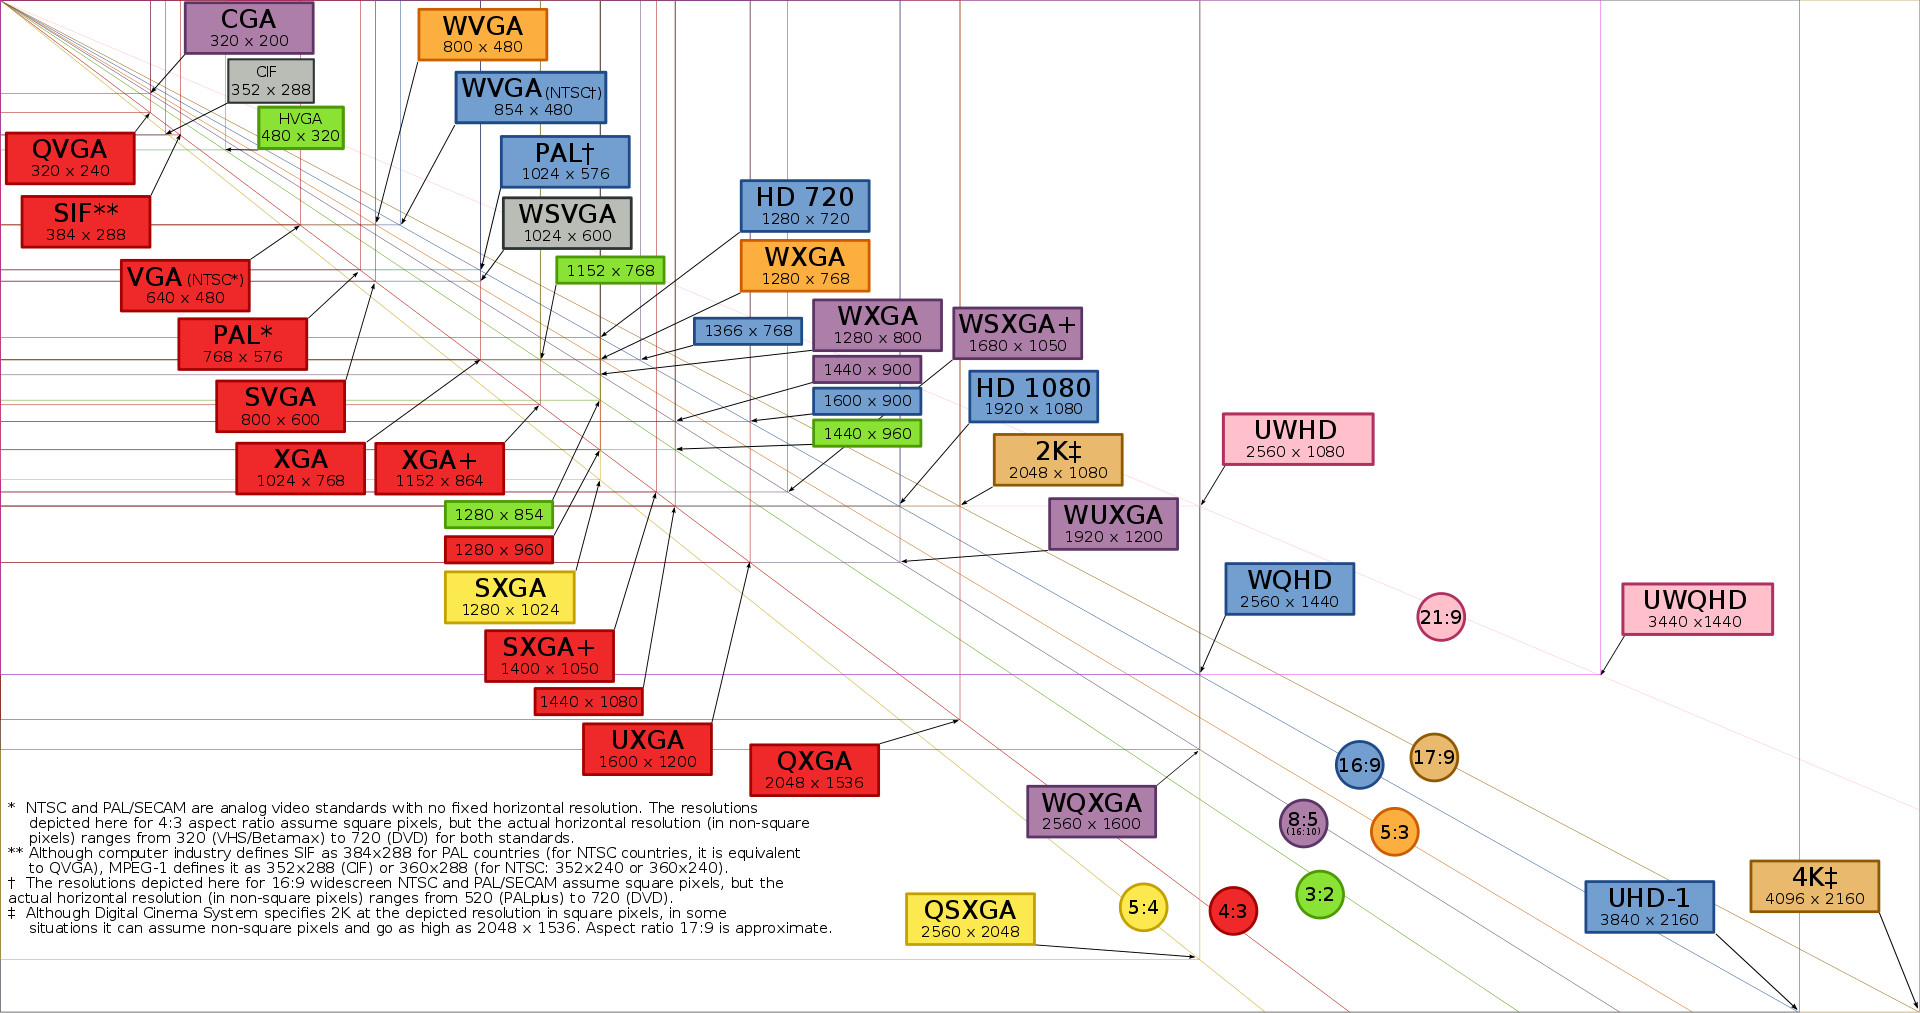

In [ ]:
df.loc[(df["ram"]>512) & (df["px_height"]<240)]

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
11             1520     1          2.2         0   5       1          33   
24              503     0          1.2         1   5       1           8   
28             1453     0          1.6         1  12       1          52   
32             1319     1          0.9         0   3       1          41   
...             ...   ...          ...       ...  ..     ...         ...   
1972           1191     0          0.8         0   6       1          46   
1979           1614     0          1.2         0   1       1           9   
1983           1262     0          1.8         1  12       0          34   
1984            797     0          2.2         1   0       0          37   
1991           1882     0          2.0         0  11       1          44   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  \
0       0.6        188        2   2       20.0       756  2549     9   
11      0.5        177        8  18      151.0      1005  3826    14   
24      0.4        111        3  13      201.0      1245  2583    11   
28      0.3         96        2  18      187.0      1311  2373    10   
32      0.9        107        1  18       85.0      1152  2227    18   
...     ...        ...      ...  ..        ...       ...   ...   ...   
1972    0.8         89        6   9       42.0       807   824    19   
1979    0.1        161        3   2      173.0      1219  1832    15   
1983    0.1        149        5  16      223.0       737  3248    13   
1984    0.9        144        7   2      206.0      1167  2216     9   
1991    0.8        113        8  19        4.0       743  3579    19   

           sc_w  talk_time  three_g  touch_screen  wifi  price_range  
0      7.000000         19        0             0     1            1  
11     9.000000         13        1             1     1            3  
24     6.132743         12        1             0     0            1  
28     1.000000         10        1             1     1            2  
32     5.000000          3        1             1     1            1  
...         ...        ...      ...           ...   ...          ...  
1972  18.000000          7        1             0     0            0  
1979   8.000000         11        1             0     0            1  
1983   3.000000          4        0             1     1            2  
1984   5.000000          6        1             0     0            1  
1991   8.000000         20        1             1     0            3  

[397 rows x 21 columns]

In [ ]:
df.loc[df["price_range"]==0,'px_height'].mean()

np.float64(536.408)

In [ ]:
df.loc[df['px_height']<240, 'px_height'] = np.nan

In [ ]:
df['px_height'] = df['px_height'].fillna(df.groupby('price_range')['px_height'].transform('mean'))

# Kreiranje novih obiljezja

In [ ]:
# Posto postoje telefoni sa i bez prednje kamere, anpravicemo novo obiljezje (has_fc)

df.loc[df['fc'] == 0, 'has_fc'] = 0 # nema prednju kameru
df.loc[df['fc'] > 0, 'has_fc'] = 1 # ima prednju kameru

df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  pc    px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2   2   786.934862       756  2549     9   7.0         19   
1        136        3   6   905.000000      1988  2631    17   3.0          7   
2        145        5   6  1263.000000      1716  2603    11   2.0          9   
3        131        6   9  1216.000000      1786  2769    16   8.0         11   
4        141        2  14  1208.000000      1212  1411     8   2.0         15   

   three_g  touch_screen  wifi  price_range  has_fc  
0        0             0     1            1     1.0  
1        1             1     0            2     0.0  
2        1             1     0            2     1.0  
3        1             0     0            2     0.0  
4        1             1     0            1     1.0

In [ ]:
# Isto ponoviti i za primarnu kameru

df.loc[df['pc'] == 0, 'has_pc'] = 0 # nema primarnu kameru
df.loc[df['pc'] > 0, 'has_pc'] = 1 # ima primarnu kameru

df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  pc    px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2   2   786.934862       756  2549     9   7.0         19   
1        136        3   6   905.000000      1988  2631    17   3.0          7   
2        145        5   6  1263.000000      1716  2603    11   2.0          9   
3        131        6   9  1216.000000      1786  2769    16   8.0         11   
4        141        2  14  1208.000000      1212  1411     8   2.0         15   

   three_g  touch_screen  wifi  price_range  has_fc  has_pc  
0        0             0     1            1     1.0     1.0  
1        1             1     0            2     0.0     1.0  
2        1             1     0            2     1.0     1.0  
3        1             0     0            2     0.0     1.0  
4        1             1     0            1     1.0     1.0

In [ ]:
df.loc[df["price_range"]==0,'px_height'].mean()

np.float64(679.6027027027027)

In [ ]:
df.loc[df["price_range"]==1,'px_height'].mean()

np.float64(786.9348624255811)

In [ ]:
df.loc[df["price_range"]==2,'px_height'].mean()

np.float64(785.4109947643979)

In [ ]:
df.loc[df["price_range"]==3,'px_height'].mean()

np.float64(874.0515475395235)

#### Racunanje velicine ekrana

- Dobijanje velicine ekrana koristeci Pitagorinu teoremu
- Prvo treba da pretvorimo visinu i sirinu ekrana iz centimetara u inche, jer je to standardna jedinica u industriji
- 1 centimetar je jednak 0.3937007874 inca

- Resurs :
    - https://www.rapidtables.com/convert/length/cm-to-inch.html
    
    
#### Formula za pretvaranje centimetara u inche
\begin{equation}
1 cm = \frac{1}{2.54} = 0.3937007874
\end{equation}


#### Pitagorina teorema
\begin{equation}
C = \sqrt{A^2 + B^2}
\end{equation}





In [ ]:
df['sc_h'] = df['sc_h'] / 2.54
df['sc_w'] = df['sc_w'] / 2.54

df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  pc    px_height  px_width   ram      sc_h      sc_w  \
0        188        2   2   786.934862       756  2549  3.543307  2.755906   
1        136        3   6   905.000000      1988  2631  6.692913  1.181102   
2        145        5   6  1263.000000      1716  2603  4.330709  0.787402   
3        131        6   9  1216.000000      1786  2769  6.299213  3.149606   
4        141        2  14  1208.000000      1212  1411  3.149606  0.787402   

   talk_time  three_g  touch_screen  wifi  price_range  has_fc  has_pc  
0         19        0             0     1            1     1.0     1.0  
1          7        1             1     0            2     0.0     1.0  
2          9        1             1     0            2     1.0     1.0  
3         11        1             0     0            2     0.0     1.0  
4         15        1             1     0            1     1.0     1.0

In [ ]:
df['screen_size'] = (np.sqrt(df['sc_h']**2 + df['sc_w']**2)).round(2)
df.head()

# Sada kada smo dobili velicinu ekrana u incima, mozemo odbaciti obiljezja visine i sirine telefona

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  pc    px_height  px_width   ram      sc_h      sc_w  \
0        188        2   2   786.934862       756  2549  3.543307  2.755906   
1        136        3   6   905.000000      1988  2631  6.692913  1.181102   
2        145        5   6  1263.000000      1716  2603  4.330709  0.787402   
3        131        6   9  1216.000000      1786  2769  6.299213  3.149606   
4        141        2  14  1208.000000      1212  1411  3.149606  0.787402   

   talk_time  three_g  touch_screen  wifi  price_range  has_fc  has_pc  \
0         19        0             0     1            1     1.0     1.0   
1          7        1             1     0            2     0.0     1.0   
2          9        1             1     0            2     1.0     1.0   
3         11        1             0     0            2     0.0     1.0   
4         15        1             1     0            1     1.0     1.0   

   screen_size  
0         4.49  
1         6.80  
2         4.40  
3         7.04  
4         3.25

In [ ]:
df.drop(columns = ['sc_h', 'sc_w'], inplace = True)

In [ ]:
df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  pc    px_height  px_width   ram  talk_time  three_g  \
0        188        2   2   786.934862       756  2549         19        0   
1        136        3   6   905.000000      1988  2631          7        1   
2        145        5   6  1263.000000      1716  2603          9        1   
3        131        6   9  1216.000000      1786  2769         11        1   
4        141        2  14  1208.000000      1212  1411         15        1   

   touch_screen  wifi  price_range  has_fc  has_pc  screen_size  
0             0     1            1     1.0     1.0         4.49  
1             1     0            2     0.0     1.0         6.80  
2             1     0            2     1.0     1.0         4.40  
3             0     0            2     0.0     1.0         7.04  
4             1     0            1     1.0     1.0         3.25

## Mozda izracunati PPI i neke druge osobine (kao sto je prikazano na GSMAreni) ??

# Grupisanje rezolucije ekrana u razlicite grupe

In [ ]:
df.loc[(df['px_width'] < 1280) | (df['px_height'] < 720), 'screen_quality'] = 'Not HD'
df.loc[(df['px_width'] >= 1280) | (df['px_height'] >= 720), 'screen_quality'] = 'HD'
# Full HD ?

df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  pc    px_height  px_width   ram  talk_time  three_g  \
0        188        2   2   786.934862       756  2549         19        0   
1        136        3   6   905.000000      1988  2631          7        1   
2        145        5   6  1263.000000      1716  2603          9        1   
3        131        6   9  1216.000000      1786  2769         11        1   
4        141        2  14  1208.000000      1212  1411         15        1   

   touch_screen  wifi  price_range  has_fc  has_pc  screen_size screen_quality  
0             0     1            1     1.0     1.0         4.49             HD  
1             1     0            2     0.0     1.0         6.80             HD  
2             1     0            2     1.0     1.0         4.40             HD  
3             0     0            2     0.0     1.0         7.04             HD  
4             1     0            1     1.0     1.0         3.25             HD

In [ ]:
# Postoji li dovoljno uzoraka za 1080p,1440p itd.... ???

#df.loc[(df["px_width"]>=1920) & (df["px_height"]>=1080)]

# ???


In [ ]:
df[df['screen_quality'] == 'HD']

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1993           1467     1          0.5         0   0       0          18   
1994            858     0          2.2         0   1       0          50   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   

      m_dep  mobile_wt  n_cores  pc    px_height  px_width   ram  talk_time  \
0       0.6        188        2   2   786.934862       756  2549         19   
1       0.7        136        3   6   905.000000      1988  2631          7   
2       0.9        145        5   6  1263.000000      1716  2603          9   
3       0.8        131        6   9  1216.000000      1786  2769         11   
4       0.6        141        2  14  1208.000000      1212  1411         15   
...     ...        ...      ...  ..          ...       ...   ...        ...   
1993    0.6        122        5   0   888.000000      1099  3962          5   
1994    0.1         84        1   2   528.000000      1416  3978          3   
1995    0.8        106        6  14  1222.000000      1890   668         19   
1996    0.2        187        4   3   915.000000      1965  2032         16   
1997    0.7        108        8   3   868.000000      1632  3057          5   

      three_g  touch_screen  wifi  price_range  has_fc  has_pc  screen_size  \
0           0             0     1            1     1.0     1.0         4.49   
1           1             1     0            2     0.0     1.0         6.80   
2           1             1     0            2     1.0     1.0         4.40   
3           1             0     0            2     0.0     1.0         7.04   
4           1             1     0            1     1.0     1.0         3.25   
...       ...           ...   ...          ...     ...     ...          ...   
1993        1             1     1            3     0.0     0.0         7.32   
1994        1             1     0            3     1.0     1.0         9.19   
1995        1             1     0            0     0.0     1.0         5.35   
1996        1             1     1            2     0.0     1.0         5.85   
1997        1             1     0            3     1.0     1.0         3.57   

     screen_quality  
0                HD  
1                HD  
2                HD  
3                HD  
4                HD  
...             ...  
1993             HD  
1994             HD  
1995             HD  
1996             HD  
1997             HD  

[1347 rows x 23 columns]

In [ ]:
df[df['screen_quality'] == 'Not HD']

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
6              1821     0          1.7         0   4       1          10   
7              1954     0          0.5         1   0       0          24   
8              1445     1          0.5         0   0       0          53   
10              769     1          2.9         1   0       0           9   
12             1815     0          2.8         0   2       0          33   
...             ...   ...          ...       ...  ..     ...         ...   
1987            618     1          1.0         0   9       1          13   
1988           1547     1          2.9         0   2       0          57   
1989            586     0          2.8         0   2       0          15   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  talk_time  \
6       0.8        139        8  10      381.0      1018  3220         18   
7       0.8        187        4   0      512.0      1149   700          5   
8       0.7        174        7  14      386.0       836  1099         20   
10      0.1        182        5   1      248.0       874  3946          7   
12      0.6        159        4  17      607.0       748  1482          2   
...     ...        ...      ...  ..        ...       ...   ...        ...   
1987    0.1         80        4  15      591.0       724  1424          7   
1988    0.4        114        1   3      347.0       957  1620         19   
1989    0.2         83        3  11      241.0       854  2592          3   
1998    0.1        145        5   5      336.0       670   869         19   
1999    0.9        168        6  16      483.0       754  3919          2   

      three_g  touch_screen  wifi  price_range  has_fc  has_pc  screen_size  \
6           1             0     1            3     1.0     1.0         6.01   
7           1             1     1            0     0.0     0.0         6.41   
8           1             0     0            0     0.0     1.0         6.70   
10          0             0     0            3     0.0     1.0         2.12   
12          1             0     0            1     1.0     1.0         7.49   
...       ...           ...   ...          ...     ...     ...          ...   
1987        1             1     0            0     1.0     1.0         7.56   
1988        0             1     1            1     1.0     1.0         3.63   
1989        0             0     0            1     1.0     1.0         5.68   
1998        1             1     1            0     1.0     1.0         8.11   
1999        1             1     1            3     1.0     1.0         7.64   

     screen_quality  
6            Not HD  
7            Not HD  
8            Not HD  
10           Not HD  
12           Not HD  
...             ...  
1987         Not HD  
1988         Not HD  
1989         Not HD  
1998         Not HD  
1999         Not HD  

[653 rows x 23 columns]

# Grupisanje RAM-a

In [ ]:
bin_ram_size = [256, 512, 1000, 2000, 3000, 4000]
label_ram = ['256 to 512 MB', '512 MB to 1GB', '1 to 2 GB', '2 to 3 GB', '3 to 4 GB']
df['ram_size'] = pd.cut(df['ram'], bins = bin_ram_size, labels = label_ram)

df.head()

# Mozda da zaokruzimo na najblizu 'validnu' vrijednost 2^x (256,512,1024....) ?????

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  pc    px_height  px_width   ram  talk_time  three_g  \
0        188        2   2   786.934862       756  2549         19        0   
1        136        3   6   905.000000      1988  2631          7        1   
2        145        5   6  1263.000000      1716  2603          9        1   
3        131        6   9  1216.000000      1786  2769         11        1   
4        141        2  14  1208.000000      1212  1411         15        1   

   touch_screen  wifi  price_range  has_fc  has_pc  screen_size  \
0             0     1            1     1.0     1.0         4.49   
1             1     0            2     0.0     1.0         6.80   
2             1     0            2     1.0     1.0         4.40   
3             0     0            2     0.0     1.0         7.04   
4             1     0            1     1.0     1.0         3.25   

  screen_quality   ram_size  
0             HD  2 to 3 GB  
1             HD  2 to 3 GB  
2             HD  2 to 3 GB  
3             HD  2 to 3 GB  
4             HD  1 to 2 GB

In [ ]:
df["ram_size"].isna().sum()

np.int64(1)

In [ ]:
df[df["ram_size"].isna()]

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1745            926     1          0.8         0   6       1          59   

      m_dep  mobile_wt  n_cores  pc   px_height  px_width  ram  talk_time  \
1745    0.8        161        7  14  679.602703       793  256          2   

      three_g  touch_screen  wifi  price_range  has_fc  has_pc  screen_size  \
1745        1             0     1            0     1.0     1.0          7.6   

     screen_quality ram_size  
1745         Not HD      NaN

In [ ]:
df.loc[(df['ram'] == 256) & (df['ram_size'].isna()), 'ram_size'] = '256 to 512 MB'

In [ ]:
df.isna().sum()

battery_power     0
blue              0
clock_speed       0
dual_sim          0
fc                0
four_g            0
int_memory        0
m_dep             0
mobile_wt         0
n_cores           0
pc                0
px_height         0
px_width          0
ram               0
talk_time         0
three_g           0
touch_screen      0
wifi              0
price_range       0
has_fc            0
has_pc            0
screen_size       0
screen_quality    0
ram_size          0
dtype: int64

# Grupisanje radnog takta CPU

In [ ]:
clock_speed_bin = [0, 1.0,1.5,2.0,2.5,3.0]
clock_bin_label = ['upto 1GHz', 'upto 1.5GHz', 'upto 2GHz', 'upto 2.5GHz', 'upto 3.0GHz']

df['speed'] = pd.cut(df['clock_speed'], bins = clock_speed_bin, labels = clock_bin_label)

df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  pc    px_height  px_width   ram  talk_time  three_g  \
0        188        2   2   786.934862       756  2549         19        0   
1        136        3   6   905.000000      1988  2631          7        1   
2        145        5   6  1263.000000      1716  2603          9        1   
3        131        6   9  1216.000000      1786  2769         11        1   
4        141        2  14  1208.000000      1212  1411         15        1   

   touch_screen  wifi  price_range  has_fc  has_pc  screen_size  \
0             0     1            1     1.0     1.0         4.49   
1             1     0            2     0.0     1.0         6.80   
2             1     0            2     1.0     1.0         4.40   
3             0     0            2     0.0     1.0         7.04   
4             1     0            1     1.0     1.0         3.25   

  screen_quality   ram_size        speed  
0             HD  2 to 3 GB  upto 2.5GHz  
1             HD  2 to 3 GB    upto 1GHz  
2             HD  2 to 3 GB    upto 1GHz  
3             HD  2 to 3 GB  upto 2.5GHz  
4             HD  1 to 2 GB  upto 1.5GHz

In [ ]:
df.loc[df['n_cores'] == 1 , 'multicore_processor'] = 0
df.loc[df['n_cores'] > 1 , 'multicore_processor'] = 1

df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  pc    px_height  px_width   ram  talk_time  three_g  \
0        188        2   2   786.934862       756  2549         19        0   
1        136        3   6   905.000000      1988  2631          7        1   
2        145        5   6  1263.000000      1716  2603          9        1   
3        131        6   9  1216.000000      1786  2769         11        1   
4        141        2  14  1208.000000      1212  1411         15        1   

   touch_screen  wifi  price_range  has_fc  has_pc  screen_size  \
0             0     1            1     1.0     1.0         4.49   
1             1     0            2     0.0     1.0         6.80   
2             1     0            2     1.0     1.0         4.40   
3             0     0            2     0.0     1.0         7.04   
4             1     0            1     1.0     1.0         3.25   

  screen_quality   ram_size        speed  multicore_processor  
0             HD  2 to 3 GB  upto 2.5GHz                  1.0  
1             HD  2 to 3 GB    upto 1GHz                  1.0  
2             HD  2 to 3 GB    upto 1GHz                  1.0  
3             HD  2 to 3 GB  upto 2.5GHz                  1.0  
4             HD  1 to 2 GB  upto 1.5GHz                  1.0

# Grupisanje rezolucije kamere

In [ ]:
bin_camera = [0,4,8,12,16,20]
bin_camera_label = ['upto 4MP', 'upto 8MP', 'upto 12MP', 'upto 16MP', 'upto 20MP']
camera_dict = {0:'No Camera'}

df['primary_camera'] = pd.cut(df['pc'], bins = bin_camera, labels = bin_camera_label)


df['primary_camera'] = df['primary_camera'].cat.add_categories('No Camera')
df['primary_camera'] = df['primary_camera'].fillna(df['pc'].map(camera_dict))
df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  pc    px_height  px_width   ram  talk_time  three_g  \
0        188        2   2   786.934862       756  2549         19        0   
1        136        3   6   905.000000      1988  2631          7        1   
2        145        5   6  1263.000000      1716  2603          9        1   
3        131        6   9  1216.000000      1786  2769         11        1   
4        141        2  14  1208.000000      1212  1411         15        1   

   touch_screen  wifi  price_range  has_fc  has_pc  screen_size  \
0             0     1            1     1.0     1.0         4.49   
1             1     0            2     0.0     1.0         6.80   
2             1     0            2     1.0     1.0         4.40   
3             0     0            2     0.0     1.0         7.04   
4             1     0            1     1.0     1.0         3.25   

  screen_quality   ram_size        speed  multicore_processor primary_camera  
0             HD  2 to 3 GB  upto 2.5GHz                  1.0       upto 4MP  
1             HD  2 to 3 GB    upto 1GHz                  1.0       upto 8MP  
2             HD  2 to 3 GB    upto 1GHz                  1.0       upto 8MP  
3             HD  2 to 3 GB  upto 2.5GHz                  1.0      upto 12MP  
4             HD  1 to 2 GB  upto 1.5GHz                  1.0      upto 16MP

In [ ]:
bin_camera = [0,4,8,12,16,20]
bin_camera_label = ['upto 4MP', 'upto 8MP', 'upto 12MP', 'upto 16MP', 'upto 20MP']
camera_dict = {0:'No Camera'}


df['front_camera'] = pd.cut(df['fc'], bins = bin_camera, labels = bin_camera_label)


df['front_camera'] = df['front_camera'].cat.add_categories('No Camera')
df['front_camera'] = df['front_camera'].fillna(df['fc'].map(camera_dict))
df[(df['fc'] == 0) & (df['pc'] == 0)]

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
7              1954     0          0.5         1   0       0          24   
33             1310     1          2.2         1   0       1          51   
52             1654     1          1.5         1   0       1          43   
54             1073     1          0.5         1   0       0          51   
62             1156     1          1.2         1   0       1          50   
...             ...   ...          ...       ...  ..     ...         ...   
1906           1807     0          0.8         1   0       1          38   
1911           1259     0          1.2         1   0       0          13   
1931           1854     0          0.9         1   0       1          33   
1968           1667     0          1.0         1   0       1          21   
1993           1467     1          0.5         0   0       0          18   

      m_dep  mobile_wt  n_cores  pc    px_height  px_width   ram  talk_time  \
7       0.8        187        4   0   512.000000      1149   700          5   
33      0.6        100        4   0   874.051548      1919  3845         12   
52      0.3        109        2   0   546.000000       629  3112         10   
54      0.5        145        7   0   690.000000       804  2908         18   
62      0.8        159        2   0   322.000000       547   470         15   
...     ...        ...      ...  ..          ...       ...   ...        ...   
1906    0.2         97        8   0  1332.000000      1814  1069          7   
1911    0.5         97        2   0  1210.000000      1989   340          4   
1931    0.4        195        1   0   665.000000       718  1675          9   
1968    0.9        138        2   0  1211.000000      1396   635         15   
1993    0.6        122        5   0   888.000000      1099  3962          5   

      three_g  touch_screen  wifi  price_range  has_fc  has_pc  screen_size  \
7           1             1     1            0     0.0     0.0         6.41   
33          1             1     0            3     0.0     0.0         3.80   
52          1             1     0            3     0.0     0.0         5.12   
54          0             1     0            2     0.0     0.0         3.42   
62          1             1     0            0     0.0     0.0         3.71   
...       ...           ...   ...          ...     ...     ...          ...   
1906        1             0     0            1     0.0     0.0         3.63   
1911        1             0     1            0     0.0     0.0         8.43   
1931        1             0     1            1     0.0     0.0         7.26   
1968        1             0     0            0     0.0     0.0         7.24   
1993        1             1     1            3     0.0     0.0         7.32   

     screen_quality       ram_size        speed  multicore_processor  \
7            Not HD  512 MB to 1GB    upto 1GHz                  1.0   
33               HD      3 to 4 GB  upto 2.5GHz                  1.0   
52           Not HD      3 to 4 GB  upto 1.5GHz                  1.0   
54           Not HD      2 to 3 GB    upto 1GHz                  1.0   
62           Not HD  256 to 512 MB  upto 1.5GHz                  1.0   
...             ...            ...          ...                  ...   
1906             HD      1 to 2 GB    upto 1GHz                  1.0   
1911             HD  256 to 512 MB  upto 1.5GHz                  1.0   
1931         Not HD      1 to 2 GB    upto 1GHz                  0.0   
1968             HD  512 MB to 1GB    upto 1GHz                  1.0   
1993             HD      3 to 4 GB    upto 1GHz                  1.0   

     primary_camera front_camera  
7         No Camera    No Camera  
33        No Camera    No Camera  
52        No Camera    No Camera  
54        No Camera    No Camera  
62        No Camera    No Camera  
...             ...          ...  
1906      No Camera    No Camera  
1911      No Camera    No Camera  
1931      No Ca

# EDA

In [ ]:
df.head(1)

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   

   mobile_wt  n_cores  pc   px_height  px_width   ram  talk_time  three_g  \
0        188        2   2  786.934862       756  2549         19        0   

   touch_screen  wifi  price_range  has_fc  has_pc  screen_size  \
0             0     1            1     1.0     1.0         4.49   

  screen_quality   ram_size        speed  multicore_processor primary_camera  \
0             HD  2 to 3 GB  upto 2.5GHz                  1.0       upto 4MP   

  front_camera  
0     upto 4MP

In [ ]:
df.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      0.521500    32.046500     0.501750   140.249000     4.520500   
std       0.499662    18.145715     0.288416    35.399655     2.287837   
min       0.000000     2.000000     0.100000    80.000000     1.000000   
25%       0.000000    16.000000     0.200000   109.000000     3.000000   
50%       1.000000    32.000000     0.500000   141.000000     4.000000   
75%       1.000000    48.000000     0.800000   170.000000     7.000000   
max       1.000000    64.000000     1.000000   200.000000     8.000000   

                pc    px_height     px_width          ram    talk_time  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      9.916500   781.500027  1251.515500  2124.213000    11.011000   
std       6.064315   353.792639   432.199447  1084.732044     5.463955   
min       0.000000   240.000000   500.000000   256.000000     2.000000   
25%       5.000000   518.000000   874.750000  1207.500000     6.000000   
50%      10.000000   762.500000  1247.000000  2146.500000    11.000000   
75%      15.000000   947.250000  1633.000000  3064.500000    16.000000   
max      20.000000  1960.000000  1998.000000  3998.000000    20.000000   

           three_g  touch_screen         wifi  price_range       has_fc  \
count  2000.000000   2000.000000  2000.000000  2000.000000  2000.000000   
mean      0.761500      0.503000     0.507000     1.500000     0.763000   
std       0.426273      0.500116     0.500076     1.118314     0.425349   
min       0.000000      0.000000     0.000000     0.000000     0.000000   
25%       1.000000      0.000000     0.000000     0.750000     1.000000   
50%       1.000000      1.000000     1.000000     1.500000     1.000000   
75%       1.000000      1.000000     1.000000     2.250000     1.000000   
max       1.000000      1.000000     1.000000     3.000000     1.000000   

            has_pc  screen_size  multicore_processor  
count  2000.000000   2000.00000          2000.000000  
mean      0.949500      5.57026             0.879000  
std       0.219029      1.96248             0.326209  
min       0.000000      2.01000             0.000000  
25%       1.000000      3.88000             1.000000  
50%       1.000000      5.64000             1.000000  
75%       1.000000      7.10000             1.000000  
max       1.000000     10.30000             1.000000

## Univarijantna analiza

In [ ]:
df.describe(include="O")

# Vecina telefona ima ekran rezolucije 720p (ili vecu)

screen_quality
count            2000
unique              2
top                HD
freq             1347

In [ ]:
df.stb.freq(['blue'], cum_cols=False)

# Malo vise od polovine telefona ima bt

blue  count  percent
0     0   1010     50.5
1     1    990     49.5

In [ ]:
df.stb.freq(['dual_sim'], cum_cols=False)

dual_sim  count  percent
0         1   1019    50.95
1         0    981    49.05

In [ ]:
df.stb.freq(['four_g'], cum_cols=False)

four_g  count  percent
0       1   1043    52.15
1       0    957    47.85

In [ ]:
df.stb.freq(['n_cores'], cum_cols=False)

n_cores  count  percent
0        4    274    13.70
1        7    259    12.95
2        8    256    12.80
3        2    247    12.35
4        5    246    12.30
5        3    246    12.30
6        1    242    12.10
7        6    230    11.50

In [ ]:
df.stb.freq(['three_g'], cum_cols=False)

# Vecina telefona posjeduje 3g antene

three_g  count  percent
0        1   1523    76.15
1        0    477    23.85

In [ ]:
df.stb.freq(['touch_screen'], cum_cols=False)

touch_screen  count  percent
0             1   1006     50.3
1             0    994     49.7

In [ ]:
df.stb.freq(['wifi'], cum_cols=False)

wifi  count  percent
0     1   1014     50.7
1     0    986     49.3

In [ ]:
df.stb.freq(['price_range'], cum_cols=False)

price_range  count  percent
0            3    500     25.0
1            2    500     25.0
2            1    500     25.0
3            0    500     25.0

In [ ]:
df.stb.freq(['has_fc'], cum_cols=False)

has_fc  count  percent
0     1.0   1526     76.3
1     0.0    474     23.7

In [ ]:
df.stb.freq(['has_pc'], cum_cols=False)

has_pc  count  percent
0     1.0   1899    94.95
1     0.0    101     5.05

In [ ]:
df.stb.freq(['speed'], cum_cols=False)

speed  count  percent
0    upto 1GHz    728    36.40
1  upto 2.5GHz    345    17.25
2    upto 2GHz    330    16.50
3  upto 1.5GHz    312    15.60
4  upto 3.0GHz    285    14.25

In [ ]:
df.stb.freq(['ram_size'], cum_cols=False)

ram_size  count  percent
0      2 to 3 GB    556    27.80
1      3 to 4 GB    524    26.20
2      1 to 2 GB    522    26.10
3  512 MB to 1GB    255    12.75
4  256 to 512 MB    143     7.15

## Multivarijantna analiza

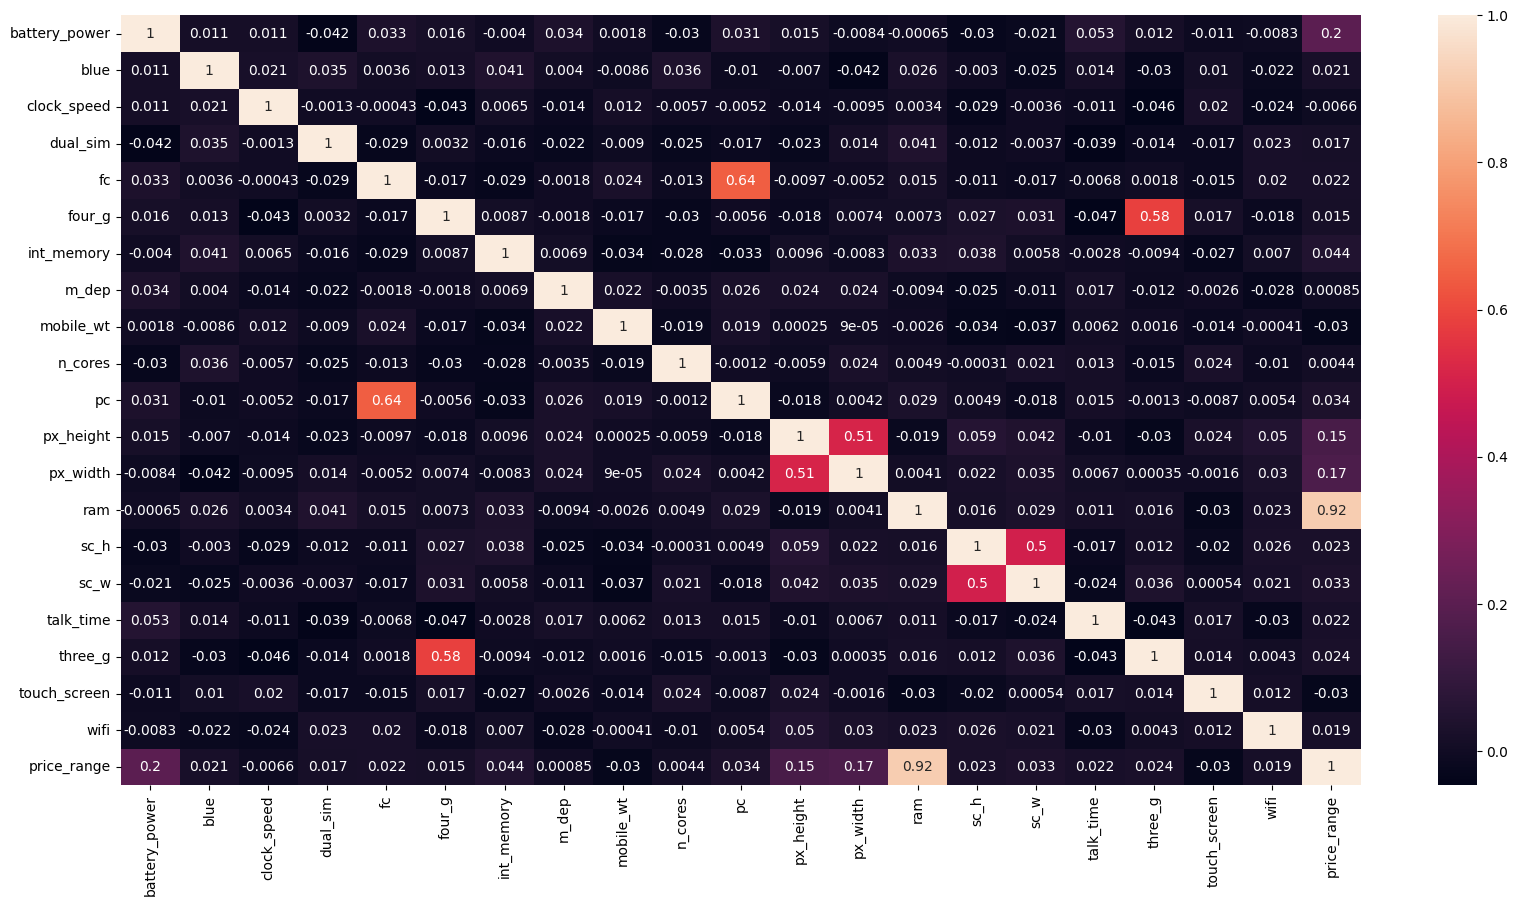

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

# RAM ima ogromnu korelaciju sa cjenovnim rangom
# Obiljezje koje ima drugu najvecu korelaciju je baterija

In [ ]:
print(df.corr(numeric_only=True))

               battery_power      blue  clock_speed  dual_sim        fc  \
battery_power       1.000000  0.011252     0.011482 -0.041847  0.033334   
blue                0.011252  1.000000     0.021419  0.035198  0.003593   
clock_speed         0.011482  0.021419     1.000000 -0.001315 -0.000434   
dual_sim           -0.041847  0.035198    -0.001315  1.000000 -0.029123   
fc                  0.033334  0.003593    -0.000434 -0.029123  1.000000   
four_g              0.015665  0.013443    -0.043073  0.003187 -0.016560   
int_memory         -0.004004  0.041177     0.006545 -0.015679 -0.029133   
m_dep               0.034085  0.004049    -0.014364 -0.022142 -0.001791   
mobile_wt           0.001844 -0.008605     0.012350 -0.008979  0.023618   
n_cores            -0.029727  0.036161    -0.005724 -0.024658 -0.013356   
pc                  0.031441 -0.009952    -0.005245 -0.017143  0.644595   
px_height           0.015472 -0.006952    -0.013500 -0.022524 -0.009706   
px_width           -0.008

In [ ]:
#corr, p_value = stats.spearmanr(df['price_range'], df['ram'])
#print(f"Spearman correlation: {corr:.3f}, p-value: {p_value}")

Spearman correlation: 0.917, p-value: 0.0


In [ ]:
correlation = df.corr(numeric_only=True)
correlation['price_range'].sort_values(ascending = False)[1:]

ram                    0.917046
battery_power          0.200723
px_height              0.183910
px_width               0.165818
int_memory             0.044435
has_pc                 0.043910
screen_size            0.034804
pc                     0.033599
three_g                0.023611
has_fc                 0.022085
fc                     0.021998
talk_time              0.021859
blue                   0.020573
wifi                   0.018785
dual_sim               0.017444
four_g                 0.014772
n_cores                0.004399
m_dep                  0.000853
clock_speed           -0.006606
multicore_processor   -0.016455
mobile_wt             -0.030302
touch_screen          -0.030411
Name: price_range, dtype: float64

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = df.drop(columns=["price_range"])

X = X.apply(pd.to_numeric, errors='coerce')

X = X.fillna(0)
X = X.replace([np.inf, -np.inf], 0)

X_const = add_constant(X)

vif = pd.DataFrame()
vif["feature"] = X_const.columns
vif["VIF"] = [variance_inflation_factor(X_const.values, i)
                   for i in range(X_const.shape[1])]

print(vif)

                feature        VIF
0                 const  92.764080
1         battery_power   1.012667
2                  blue   1.011563
3           clock_speed   1.007263
4              dual_sim   1.012523
5                    fc   2.021172
6                four_g   1.529140
7            int_memory   1.010876
8                 m_dep   1.007822
9             mobile_wt   1.005812
10              n_cores   1.501260
11                   pc   1.918898
12            px_height   1.368921
13             px_width   1.362428
14                  ram   1.010337
15            talk_time   1.011603
16              three_g   1.528468
17         touch_screen   1.005974
18                 wifi   1.008243
19               has_fc   1.672528
20               has_pc   1.306792
21          screen_size   1.010880
22       screen_quality        NaN
23             ram_size        NaN
24                speed        NaN
25  multicore_processor   1.499885
26       primary_camera        NaN
27         front_cam

### Baterija, vrijeme razgovora i RAM

In [ ]:
pd.crosstab(df['price_range'], columns = ['Average Battery'], values = df['battery_power'], aggfunc='mean')

# Kapacitet baterije generalno raste sa vecim rasponima cijena, iako ostaje priblizno isti izmedju raspona cijena 1 i 2

col_0        Average Battery
price_range                 
0                   1116.902
1                   1228.868
2                   1228.320
3                   1379.984

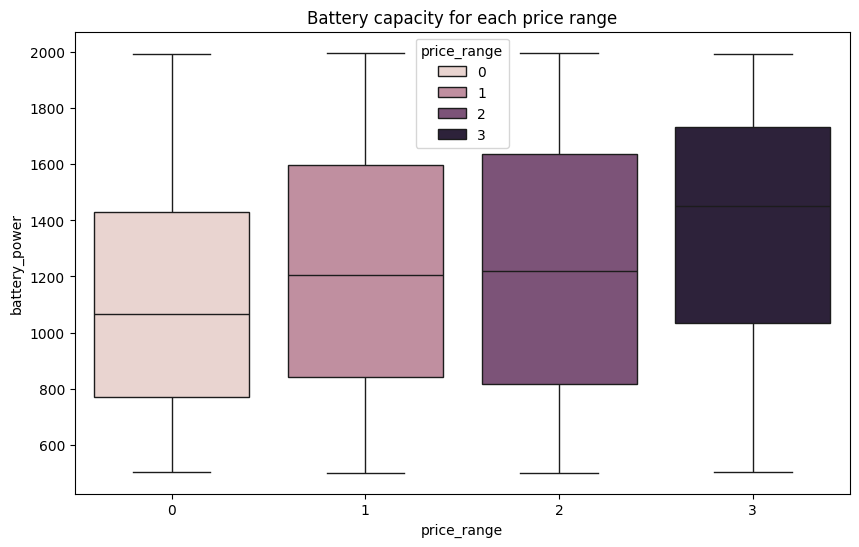

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Battery capacity for each price range")
sns.boxplot(data=df,x="price_range",y="battery_power",hue="price_range",legend="brief")
plt.show()

In [ ]:
pd.crosstab(df['price_range'], columns = 'Average Talk Time', values = df['talk_time'], aggfunc='mean')

# Izgleda da vrijeme razgovora ima mali uticaj na cijenu telefona

col_0        Average Talk Time
price_range                   
0                       10.612
1                       11.362
2                       10.972
3                       11.098

In [ ]:
df.groupby('price_range')[['talk_time','battery_power']].mean()

# Velicina baterije uglavnom raste sa cijenom,
# ali veca baterija ne znaci uvijek i duze vrijeme razgovora

talk_time  battery_power
price_range                          
0               10.612       1116.902
1               11.362       1228.868
2               10.972       1228.320
3               11.098       1379.984

In [ ]:
# Poredjenje vremena razgovora, baterije i RAM-a, jer je RAM najvise povezan sa rasponom cijena

df.groupby('price_range')[['talk_time','battery_power','ram']].mean()

# Telefoni sa visom cijenom obicno imaju vise RAM-a, a telefoni sa vise RAM-a takodje obicno imaju i vecu bateriju.

talk_time  battery_power       ram
price_range                                    
0               10.612       1116.902   785.314
1               11.362       1228.868  1679.490
2               10.972       1228.320  2582.816
3               11.098       1379.984  3449.232

### Kamere i cjeovni rang

In [ ]:
pd.crosstab(df['price_range'], df['front_camera'], normalize = 'columns')

# # Rezolucija kamere nema jasan obrazac, osim kod telefona sa 20MP kamerama...

front_camera  upto 4MP  upto 8MP  upto 12MP  upto 16MP  upto 20MP  No Camera
price_range                                                                 
0             0.257802  0.250000   0.237288   0.205607   0.222222   0.255274
1             0.244233  0.233645   0.245763   0.308411   0.277778   0.261603
2             0.223881  0.271028   0.305085   0.214953   0.166667   0.255274
3             0.274084  0.245327   0.211864   0.271028   0.333333   0.227848

In [ ]:
pd.crosstab(df['price_range'], df['primary_camera'], normalize = 'columns')

# Vecina telefona bez primarne kamere spada u najnizi cjenovni rang, sto ima smisla.

primary_camera  upto 4MP  upto 8MP  upto 12MP  upto 16MP  upto 20MP  No Camera
price_range                                                                   
0               0.263427  0.229282   0.253102   0.257453   0.224599   0.326733
1               0.255754  0.245856   0.258065   0.211382   0.272727   0.267327
2               0.245524  0.254144   0.245658   0.298103   0.221925   0.198020
3               0.235294  0.270718   0.243176   0.233062   0.280749   0.207921

In [ ]:
df.groupby('price_range')[['fc','pc']].mean()

# Prednja kamera ne utice mnogo na cjenovni rang, ali skuplji telefoni obicno imaju primarne kamere sa vise megapiksela.

fc      pc
price_range               
0            4.084   9.574
1            4.340   9.924
2            4.498  10.018
3            4.316  10.150

### Pixel, Screen Size and Price range

In [ ]:
df.groupby('price_range')[['px_height', 'px_width','screen_size']].mean()

# Velicina ekrana prati trend kapaciteta baterije, uglavnom raste sa cjenovnim rangom, iako ne mnogo izmedju raspona 1 i 2.

px_height  px_width  screen_size
price_range                                   
0            679.602703  1150.270      5.55896
1            786.934862  1251.908      5.49266
2            785.410995  1234.046      5.45398
3            874.051548  1369.838      5.77544

### Internal Memory and RAM, weight and Price Range

In [ ]:
df.groupby('price_range')[['int_memory', 'ram', 'mobile_wt']].mean()

int_memory       ram  mobile_wt
price_range                                 
0                31.174   785.314    140.552
1                32.116  1679.490    140.510
2                30.920  2582.816    143.614
3                33.976  3449.232    136.320

### Touch Screen and Price Range

In [ ]:
pd.crosstab(df['price_range'], df['touch_screen'], normalize = 'columns')

touch_screen         0         1
price_range                     
0             0.239437  0.260437
1             0.240443  0.259443
2             0.266600  0.233598
3             0.253521  0.246521

## Vizualizacija

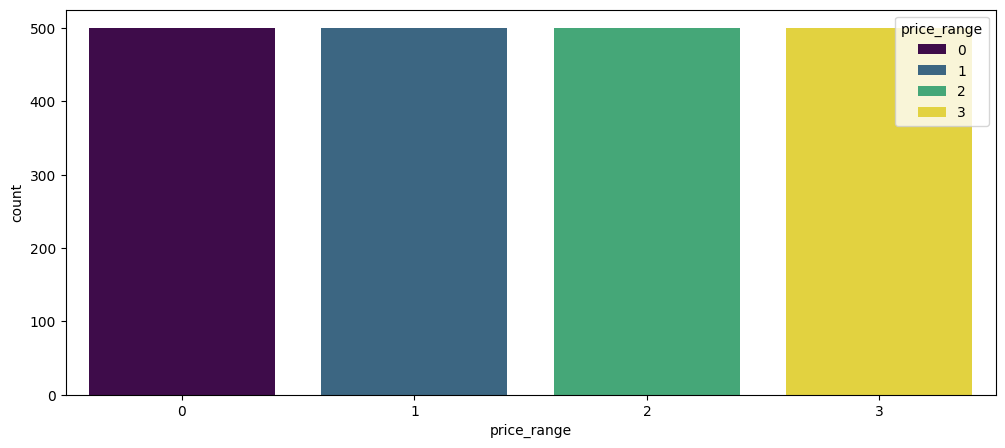

In [ ]:
#price range

plt.figure(figsize = (12, 5))
sns.countplot(data=df,x="price_range",palette="viridis",hue="price_range")
plt.show()

# there are 500 phones in each price_range

### RAM

Text(0.5, 1.0, 'RAM distribution of price range 3')

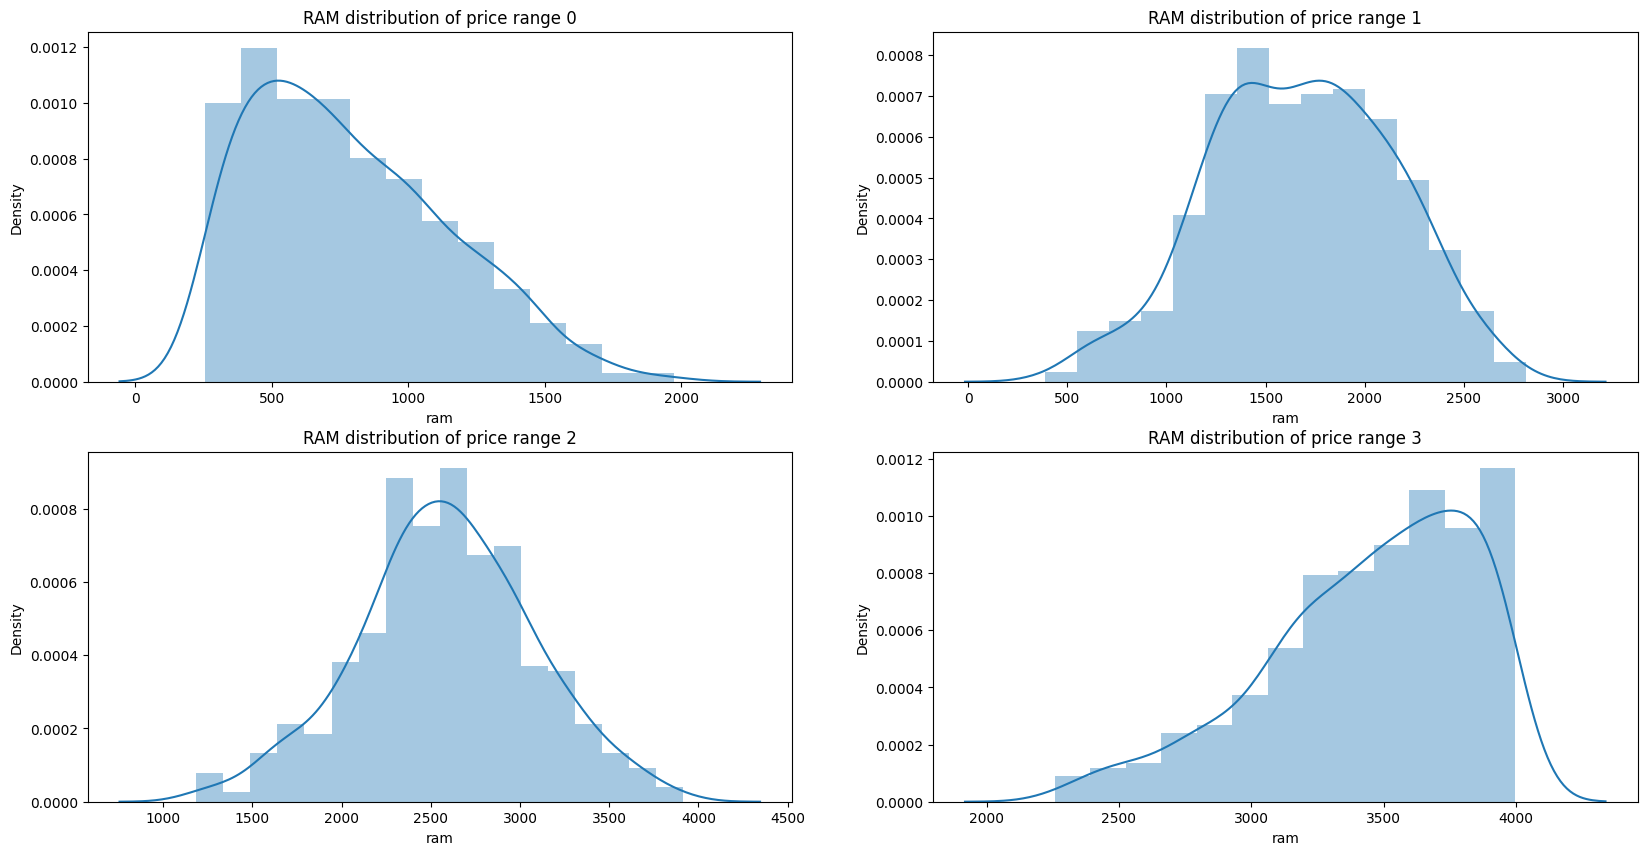

In [ ]:
df_price_0 = df[df['price_range']==0]
df_price_1 = df[df['price_range']==1]
df_price_2 = df[df['price_range']==2]
df_price_3 = df[df['price_range']==3]

plt.figure(figsize = (20, 10))
plt.subplot(2,2,1)
sns.distplot(df_price_0['ram'])
plt.title('RAM distribution of price range 0')
plt.subplot(2,2,2)
sns.distplot(df_price_1['ram'])
plt.title('RAM distribution of price range 1')
plt.subplot(2,2,3)
sns.distplot(df_price_2['ram'])
plt.title('RAM distribution of price range 2')
plt.subplot(2,2,4)
sns.distplot(df_price_3['ram'])
plt.title('RAM distribution of price range 3')

# Grafik ispod pokazuje kako se raspodjela RAM-a razlikuje po cjenovnim rangovima
# Cijenovni rang 0: uglavnom 400–700 MB RAM, maksimum ~2000 MB
# Cijenovni rang 1: 500–3000 MB RAM, najvise oko 1300–2000 MB
# Cijenovni rang 2: 1000–4000 MB RAM, vrh raspodjele ~2500 MB
# Cijenovni rang 3: 2000–4000 MB RAM, vrh raspodjele ~4000 MB
# Generalno, vise RAM-a odgovara visem cjenovnom rangu, a minimalni RAM takodje raste sa cijenom


### Baterija

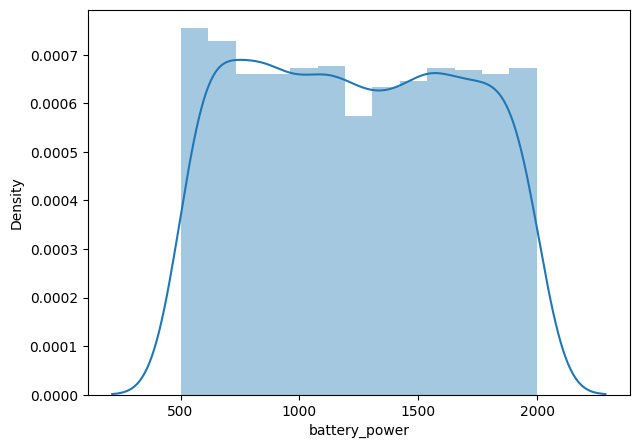

In [ ]:
plt.figure(figsize = (7, 5))
sns.distplot(df['battery_power'])
plt.show()

Text(0.5, 1.0, 'battery distribution of price range 3')

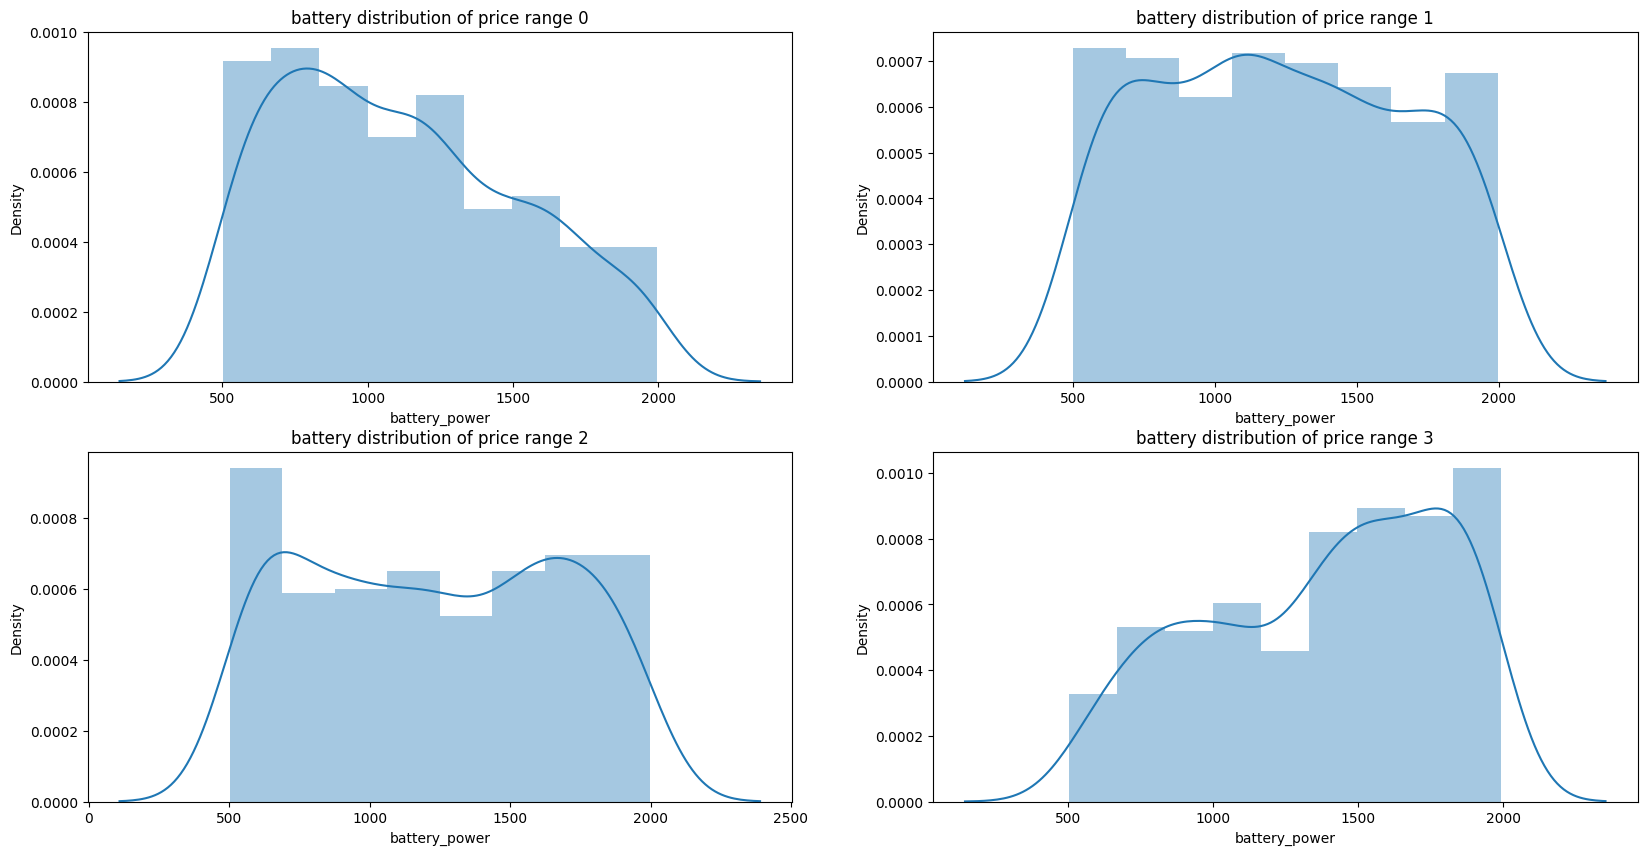

In [ ]:
plt.figure(figsize = (20, 10))
plt.subplot(2,2,1)
sns.distplot(df_price_0['battery_power'])
plt.title('battery distribution of price range 0')
plt.subplot(2,2,2)
sns.distplot(df_price_1['battery_power'])
plt.title('battery distribution of price range 1')
plt.subplot(2,2,3)
sns.distplot(df_price_2['battery_power'])
plt.title('battery distribution of price range 2')
plt.subplot(2,2,4)
sns.distplot(df_price_3['battery_power'])
plt.title('battery distribution of price range 3')

# Sam kapacitet baterije ne govori mnogo o cijeni.
# Cijenovni rang 0 uglavnom ima baterijeg kapaciteta,
# a raspodjela je blago pomjerena udesno.


### Rezolucija ekrana

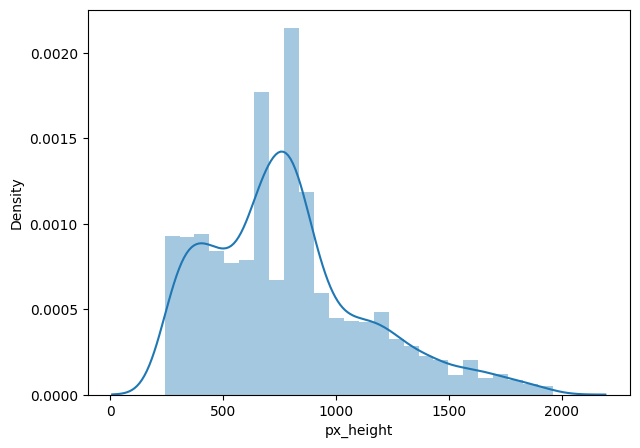

In [ ]:
plt.figure(figsize = (7, 5))
sns.distplot(df['px_height'])
plt.show()

Text(0.5, 1.0, 'Pixel Width distribution of price range 3')

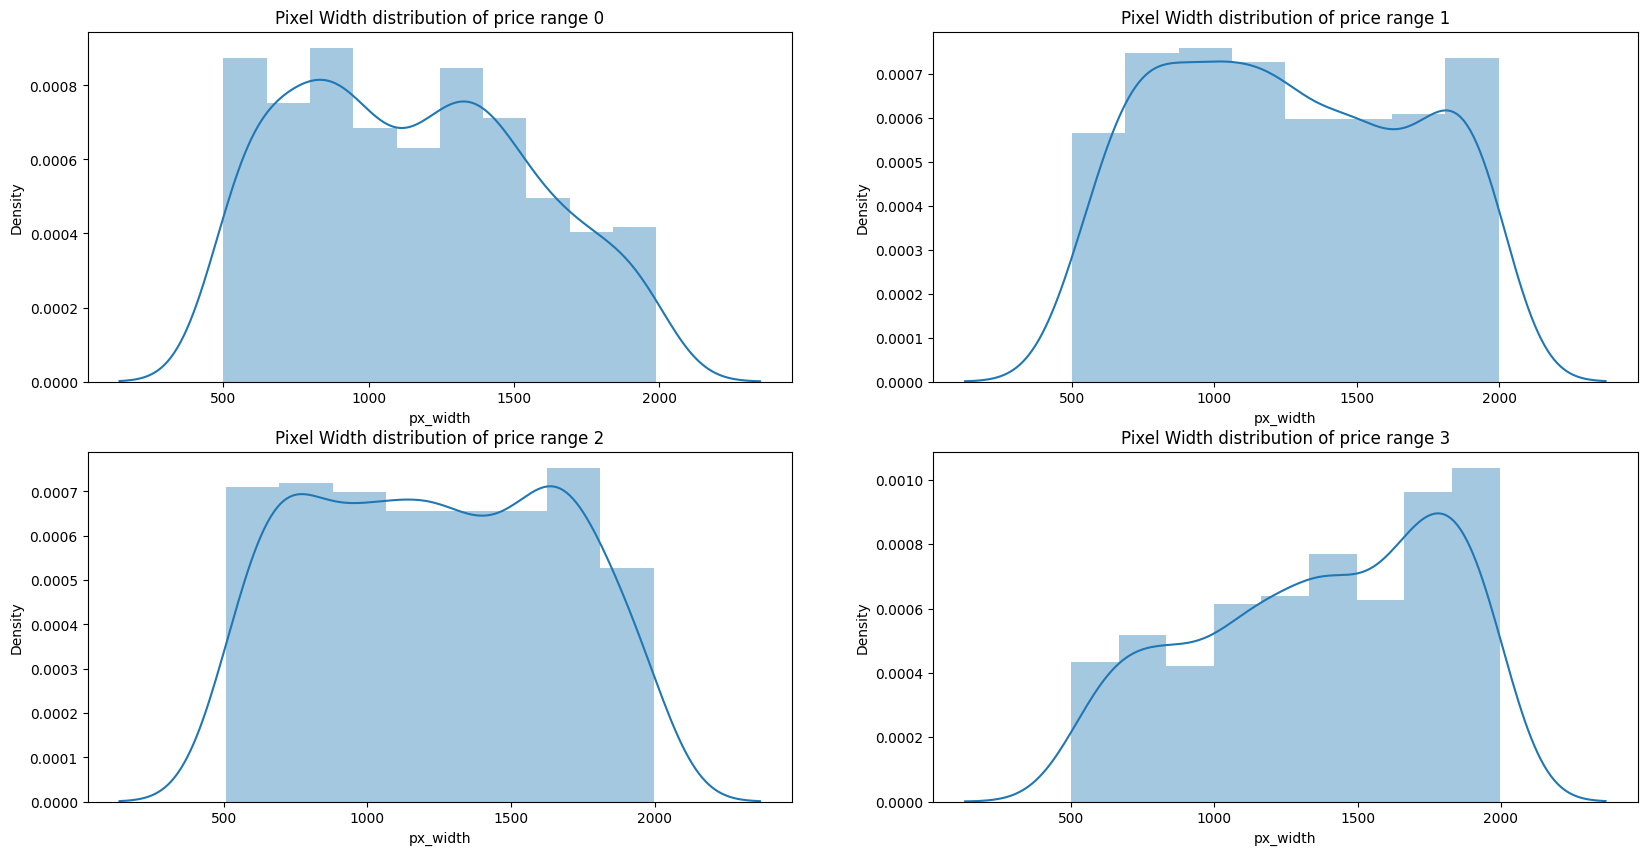

In [ ]:
plt.figure(figsize = (20, 10))
plt.subplot(2,2,1)
sns.distplot(df_price_0['px_width'])
plt.title('Pixel Width distribution of price range 0')
plt.subplot(2,2,2)
sns.distplot(df_price_1['px_width'])
plt.title('Pixel Width distribution of price range 1')
plt.subplot(2,2,3)
sns.distplot(df_price_2['px_width'])
plt.title('Pixel Width distribution of price range 2')
plt.subplot(2,2,4)
sns.distplot(df_price_3['px_width'])
plt.title('Pixel Width distribution of price range 3')

# Sirina piksela pokazuje trend:
# Raspon cijena 0 uglavnom obuhvata telefone sa manjom sirinom piksela,
# najvisi raspon cijena naginje ka vecoj sirini piksela,
# dok su rasponi 2 i 3 priblizno ravnomjerno raspodijeljeni.

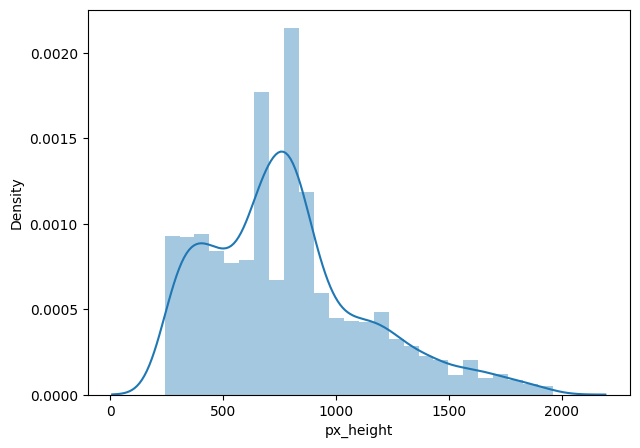

In [ ]:
plt.figure(figsize = (7, 5))
sns.distplot(df['px_height'])
plt.show()

Text(0.5, 1.0, 'Pixel Height distribution of price range 3')

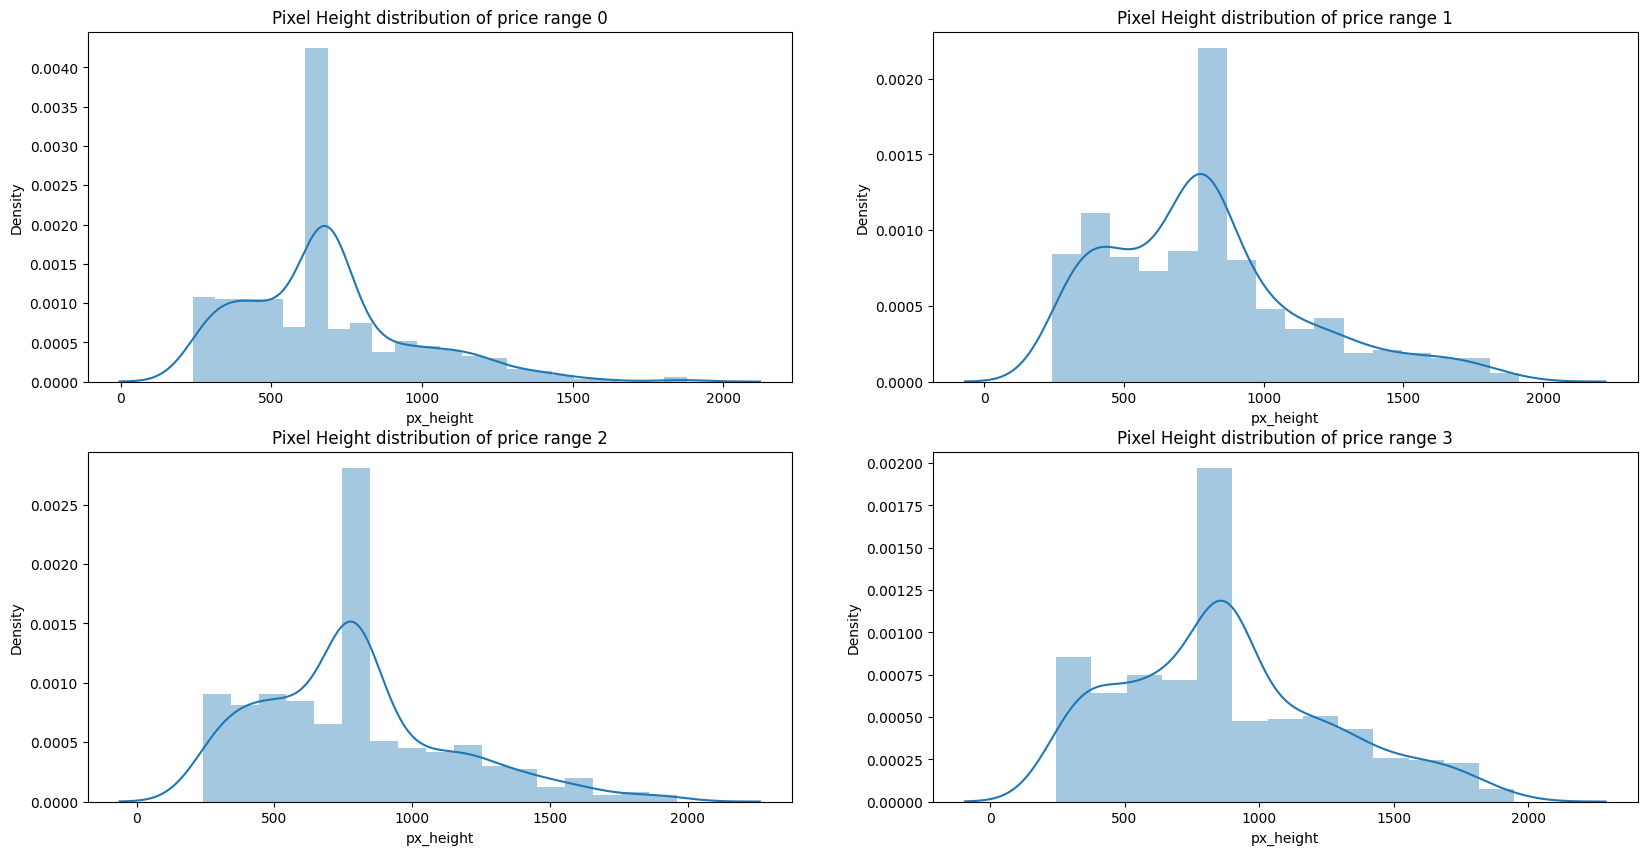

In [ ]:
plt.figure(figsize = (20, 10))
plt.subplot(2,2,1)
sns.distplot(df_price_0['px_height'])
plt.title('Pixel Height distribution of price range 0')
plt.subplot(2,2,2)
sns.distplot(df_price_1['px_height'])
plt.title('Pixel Height distribution of price range 1')
plt.subplot(2,2,3)
sns.distplot(df_price_2['px_height'])
plt.title('Pixel Height distribution of price range 2')
plt.subplot(2,2,4)
sns.distplot(df_price_3['px_height'])
plt.title('Pixel Height distribution of price range 3')

# Raspodjela sirine piksela i dalje je pomjerena udesno, cak i kada se posmatra po cjenovnim rangovima

### Interna memorija

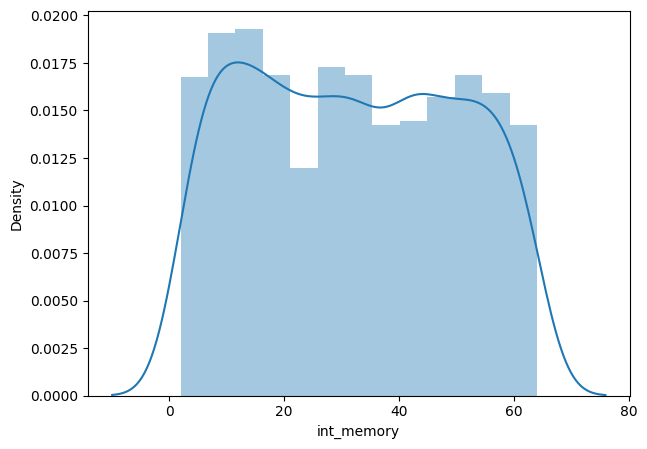

In [ ]:
plt.figure(figsize = (7, 5))
sns.distplot(df['int_memory'])
plt.show()

Text(0.5, 1.0, 'Internal memory distribution of price range 3')

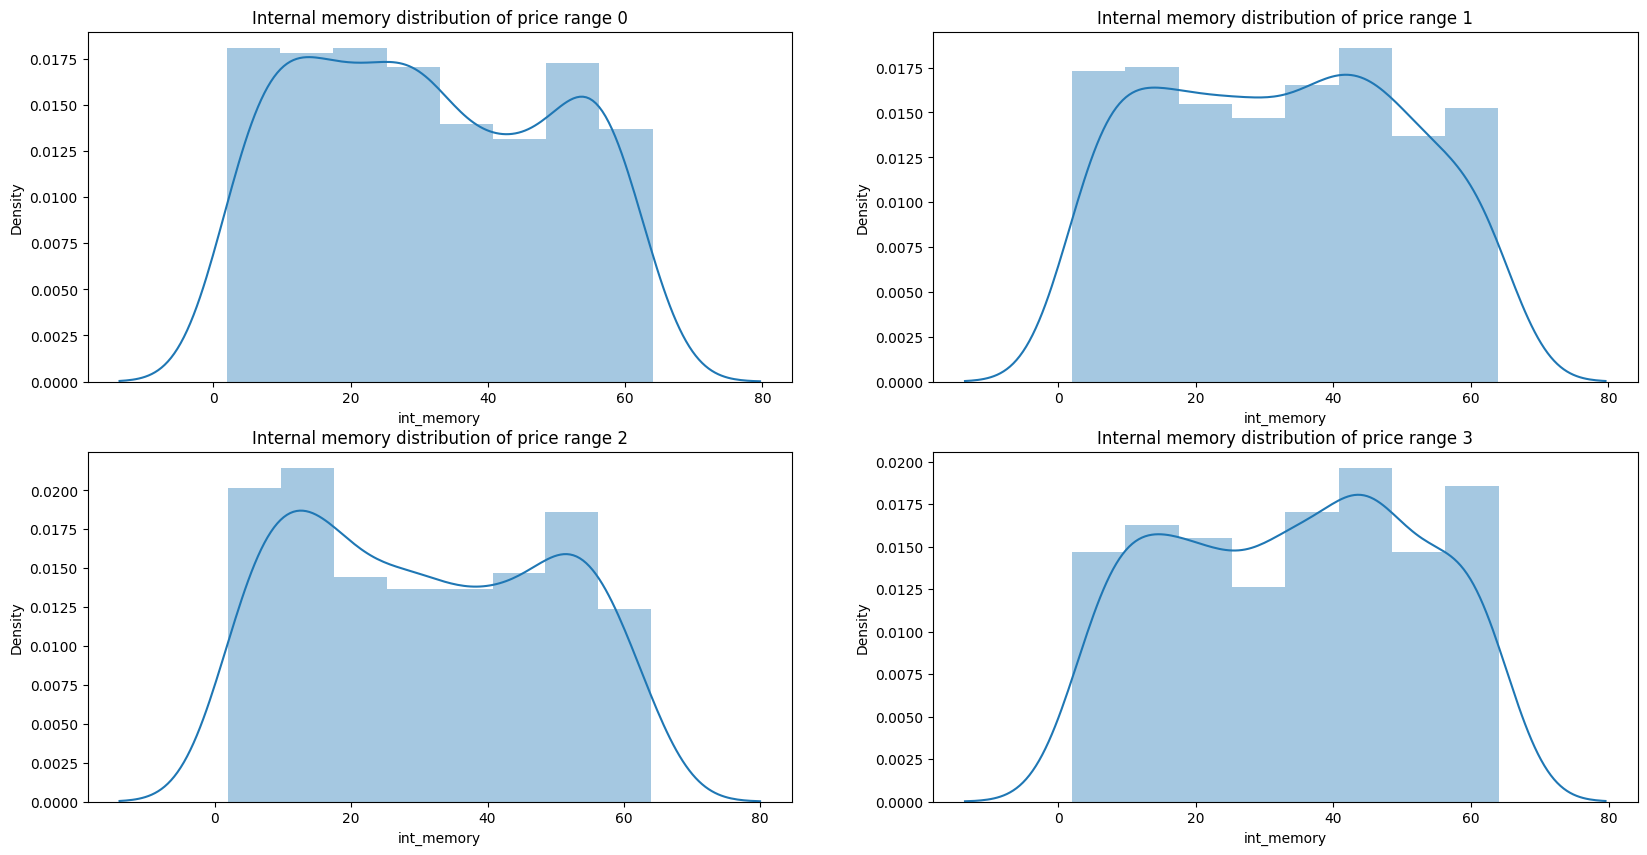

In [ ]:
plt.figure(figsize = (20, 10))
plt.subplot(2,2,1)
sns.distplot(df_price_0['int_memory'])
plt.title('Internal memory distribution of price range 0')
plt.subplot(2,2,2)
sns.distplot(df_price_1['int_memory'])
plt.title('Internal memory distribution of price range 1')
plt.subplot(2,2,3)
sns.distplot(df_price_2['int_memory'])
plt.title('Internal memory distribution of price range 2')
plt.subplot(2,2,4)
sns.distplot(df_price_3['int_memory'])
plt.title('Internal memory distribution of price range 3')

# Velicine interne memorije ne pokazuju znacajnu razliku u raspodjeli izmedju cjeovnih rangova

### 3G

<Axes: xlabel='three_g', ylabel='count'>

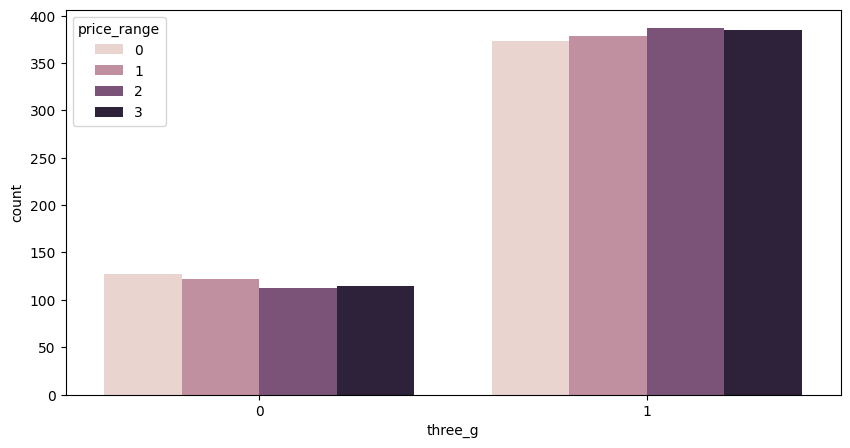

In [ ]:
plt.figure(figsize = (10, 5))
sns.countplot(data=df,x="three_g",hue="price_range")

### 4G

<Axes: xlabel='four_g', ylabel='count'>

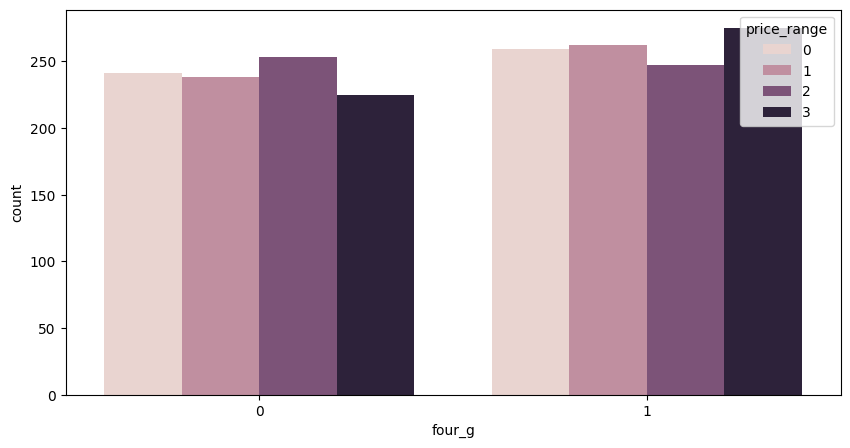

In [ ]:
plt.figure(figsize = (10, 5))
sns.countplot(data=df,x="four_g",hue="price_range")

# Ima blago vise 4G telefona nego onih bez 4G-a
# Cjenonvi rang 3 ima najvise 4G telefona u odnosu na ostale

### CPU

<Axes: xlabel='price_range', ylabel='clock_speed'>

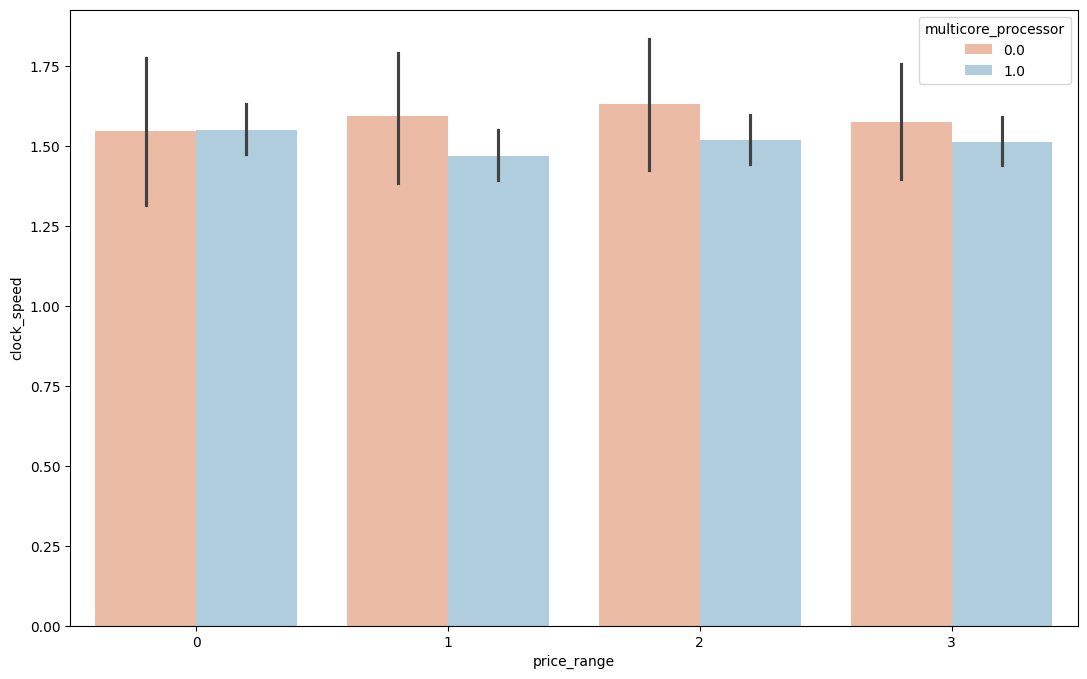

In [ ]:
plt.figure(figsize = (13, 8))
sns.barplot(data=df,x="price_range",y="clock_speed",hue="multicore_processor",palette = 'RdBu')

# Single-core procesori imaju prosjecno veci takt od multi-core u svim rangovima

# Multivarijantna vizualizacija

In [ ]:
df.head(1)

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   

   mobile_wt  n_cores  pc   px_height  px_width   ram  talk_time  three_g  \
0        188        2   2  786.934862       756  2549         19        0   

   touch_screen  wifi  price_range  has_fc  has_pc  screen_size  \
0             0     1            1     1.0     1.0         4.49   

  screen_quality   ram_size        speed  multicore_processor primary_camera  \
0             HD  2 to 3 GB  upto 2.5GHz                  1.0       upto 4MP   

  front_camera  
0     upto 4MP

## Kapacitet baterije, RAM i Cjenovni rang

<Axes: xlabel='battery_power', ylabel='ram'>

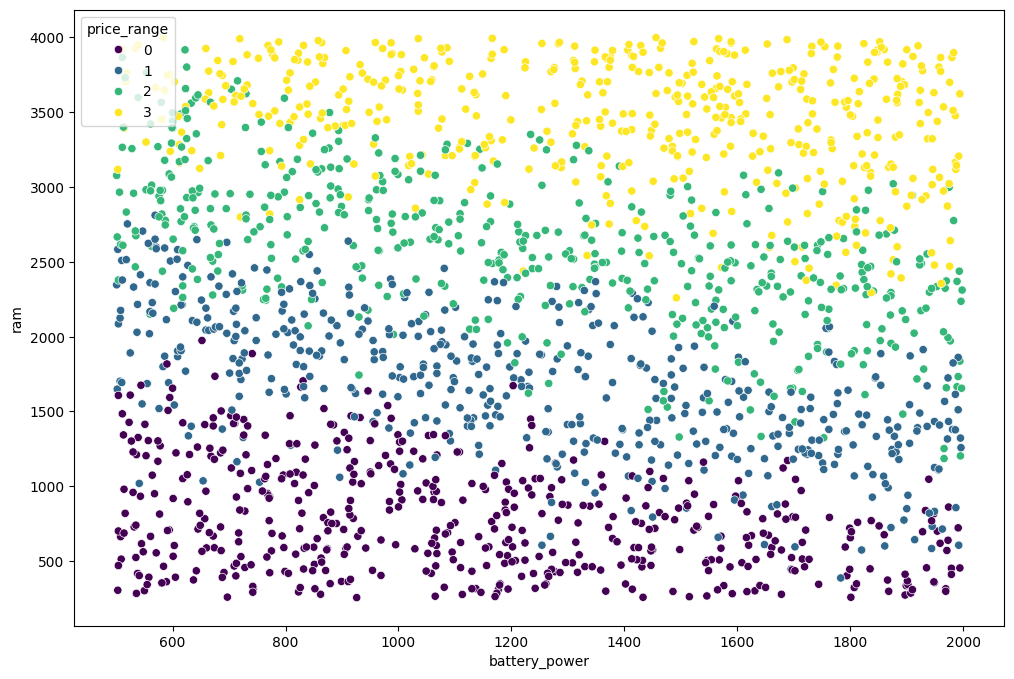

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df,x="battery_power",y="ram",hue="price_range",palette="viridis")

<Axes: xlabel='price_range', ylabel='battery_power'>

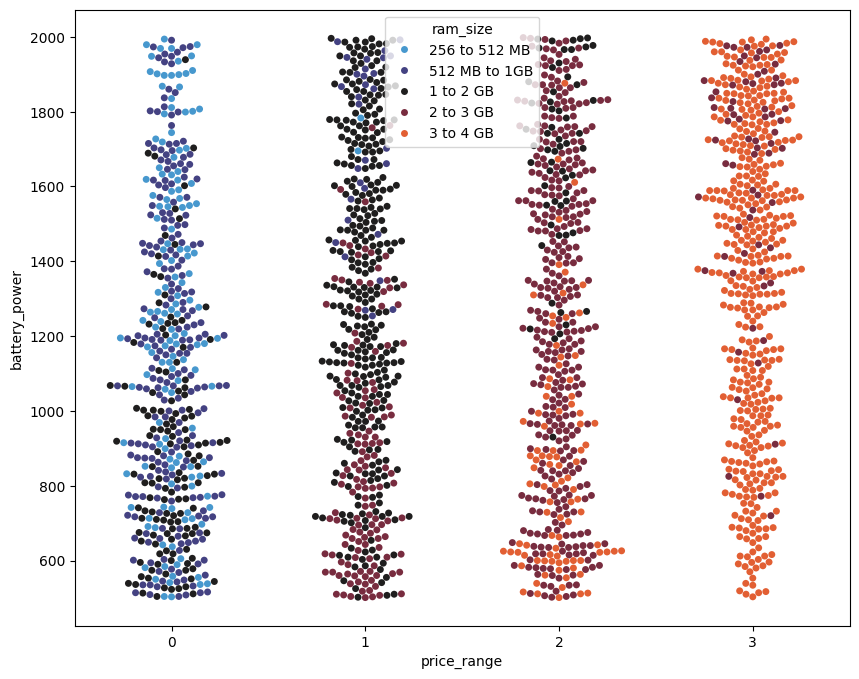

In [ ]:
plt.figure(figsize = (10, 8))
sns.swarmplot(data=df,x="price_range",y="battery_power",hue="ram_size", palette = 'icefire')

# phones in price range 3 generally have higher battery power than those in ranges 1 and 2.

## RAM, Cijena i CPU

<Axes: xlabel='price_range', ylabel='ram'>

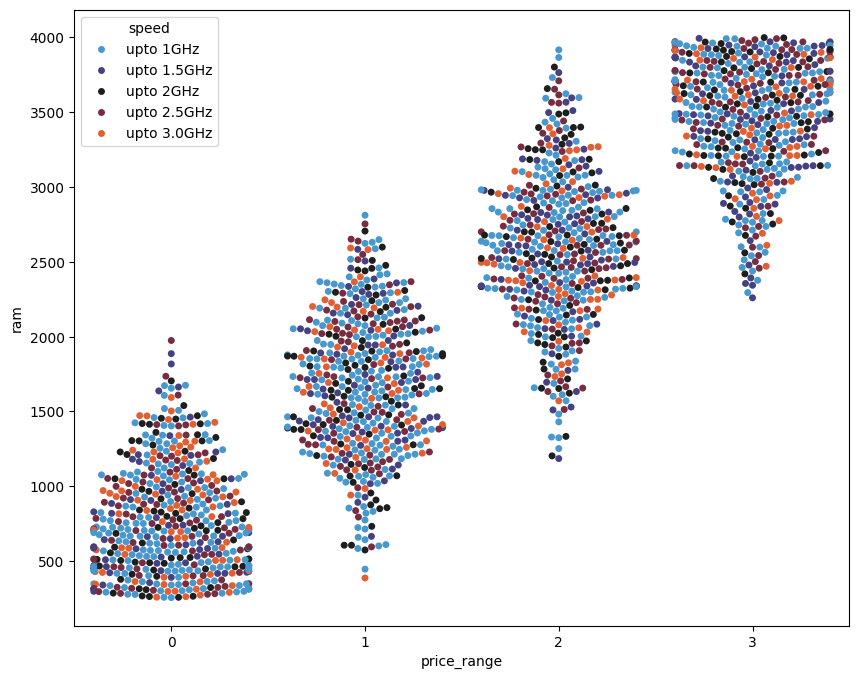

In [ ]:
#clock speed and RAM

plt.figure(figsize = (10, 8))
sns.swarmplot(data=df,x="price_range",y="ram",hue="speed", palette = 'icefire')

# the plot below shows a lot of overlap, indicating that even phones with low RAM can reach clock speeds up to 3GHz.

<Axes: xlabel='n_cores', ylabel='ram'>

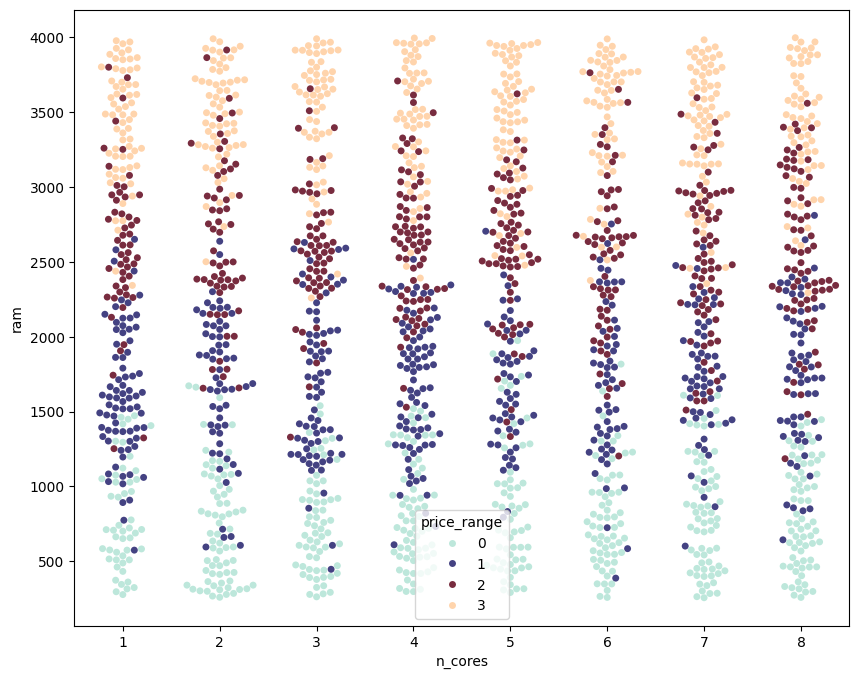

In [ ]:
# number of cores ram and price range

plt.figure(figsize = (10, 8))
sns.swarmplot(data=df,x="n_cores",y="ram",hue="price_range", palette = 'icefire')

# the graph below shows that the number of cores varies across different RAM sizes.
# you can have many cores at a low price range, or high RAM with few cores.
# here, RAM seems to be the main factor affecting price.
# for each core count, the pattern looks similar — a phone in price range 0 could have 8 cores, and one in price range 3 could have just 1 core.

<Axes: xlabel='multicore_processor', ylabel='ram'>

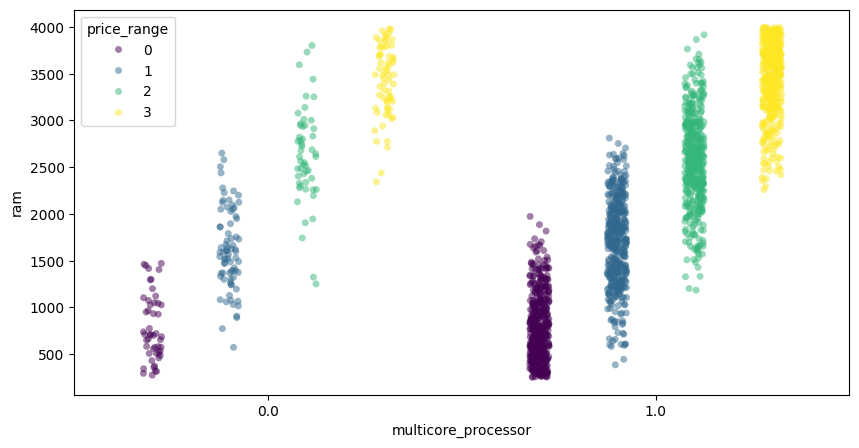

In [ ]:
plt.figure(figsize = (10, 5))

sns.stripplot(data=df,x="multicore_processor",y="ram",hue="price_range", dodge=True, alpha=0.5,palette = 'viridis')

# multicore processors are more common across all price ranges,
# but single-core processors can still appear in any price range with varying RAM sizes.

## Bluetooth,RAM i Cijena

<Axes: xlabel='blue', ylabel='ram'>

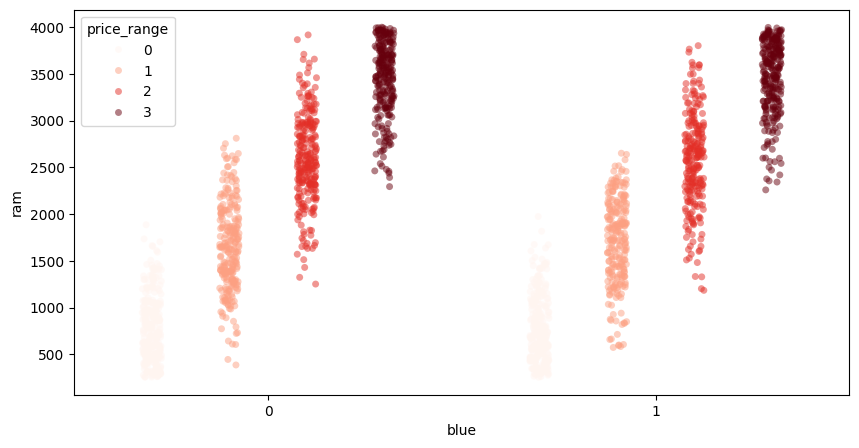

In [ ]:
plt.figure(figsize = (10, 5))
sns.stripplot(data=df,x="blue",y="ram",hue="price_range", dodge=True, alpha=0.5,palette = 'Reds')

# bluetooth doesn’t seem to affect RAM or price range.
# phones without bluetooth can have just as much RAM as those with it.

## Dual sim,RAM i Cijena

<Axes: xlabel='dual_sim', ylabel='ram'>

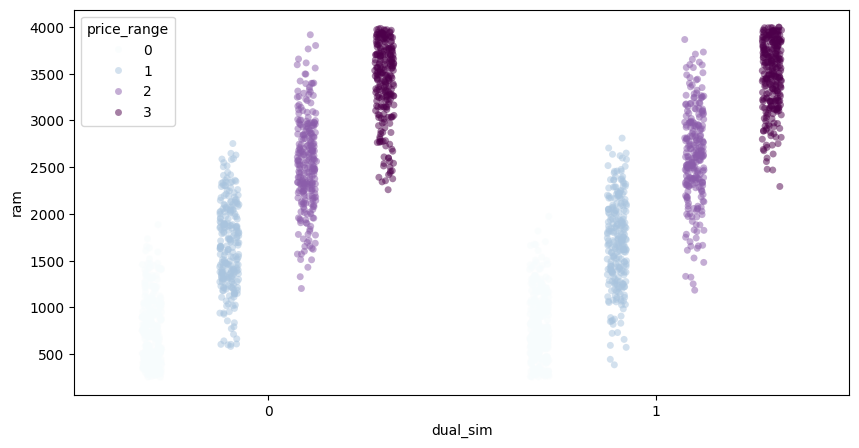

In [ ]:
plt.figure(figsize = (10, 5))
sns.stripplot(data=df,x="dual_sim",y="ram",hue="price_range", dodge=True, alpha=0.5,palette = 'BuPu')

<Axes: xlabel='dual_sim', ylabel='count'>

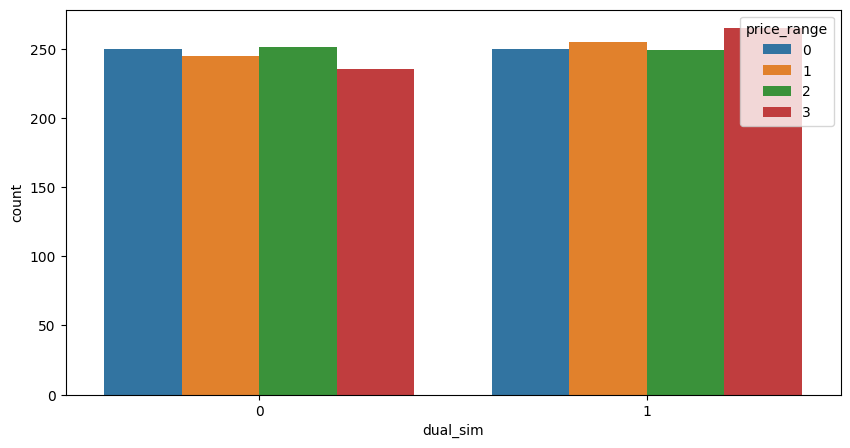

In [ ]:
plt.figure(figsize = (10, 5))
sns.countplot(data =df,x="dual_sim",hue = df['price_range'],palette="tab10")

<Axes: xlabel='dual_sim', ylabel='ram'>

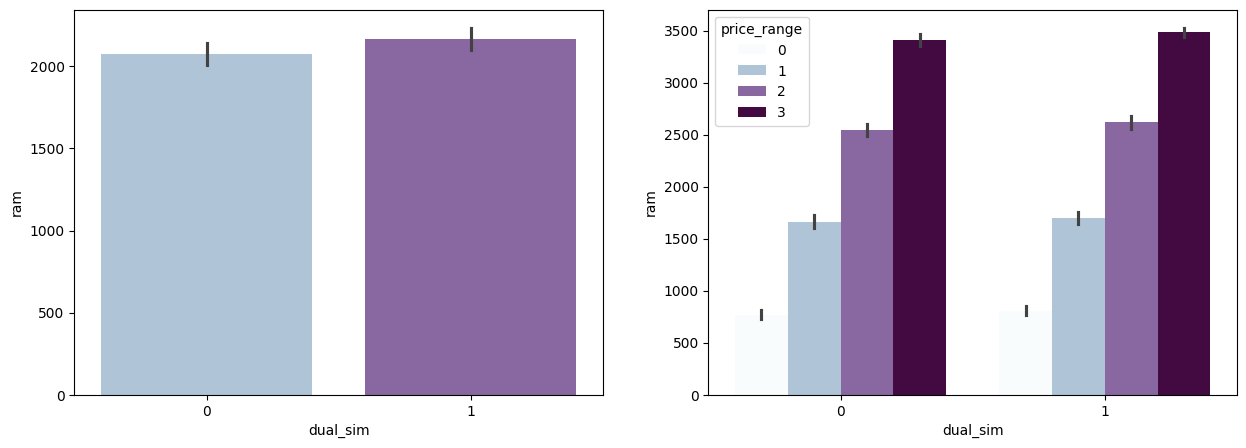

In [ ]:
plt.figure(figsize = (15, 5))

plt.subplot(1,2,1)
sns.barplot(data =df,x="dual_sim",y="ram", palette = 'BuPu')

plt.subplot(1,2,2)
sns.barplot(data =df,x="dual_sim",y="ram",hue="price_range",palette = 'BuPu')


# Dual sim telefoni imaju za nijansu vise rama od 'non dual sim'

## Interna memorija,RAM i Cijena

<Axes: xlabel='ram', ylabel='int_memory'>

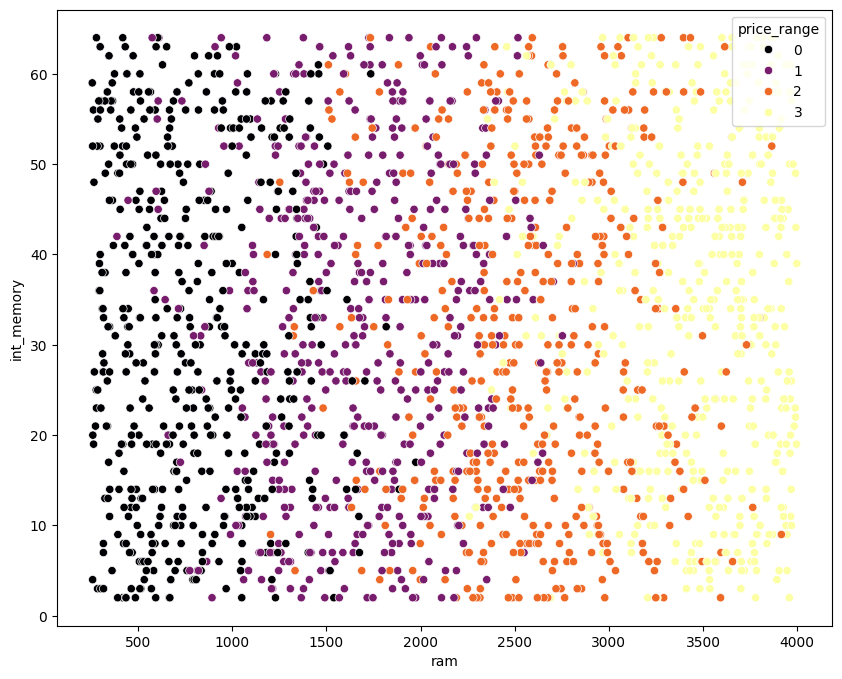

In [ ]:
plt.figure(figsize = (10, 8))
sns.scatterplot(data=df,x="ram",y="int_memory", hue ="price_range", palette = 'inferno')

# Nema pretjerane korelacije uzmedju interne memorije i RAMa

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62],
 [Text(0, 0, '2'),
  Text(1, 0, '3'),
  Text(2, 0, '4'),
  Text(3, 0, '5'),
  Text(4, 0, '6'),
  Text(5, 0, '7'),
  Text(6, 0, '8'),
  Text(7, 0, '9'),
  Text(8, 0, '10'),
  Text(9, 0, '11'),
  Text(10, 0, '12'),
  Text(11, 0, '13'),
  Text(12, 0, '14'),
  Text(13, 0, '15'),
  Text(14, 0, '16'),
  Text(15, 0, '17'),
  Text(16, 0, '18'),
  Text(17, 0, '19'),
  Text(18, 0, '20'),
  Text(19, 0, '21'),
  Text(20, 0, '22'),
  Text(21, 0, '23'),
  Text(22, 0, '24'),
  Text(23, 0, '25'),
  Text(24, 0, '26'),
  Text(25, 0, '27'),
  Text(26, 0, '28'),
  Text(27, 0, '29'),
  Text(28, 0, '30'),
  Text(29, 0, '31'),
  Text(30, 0, '32')

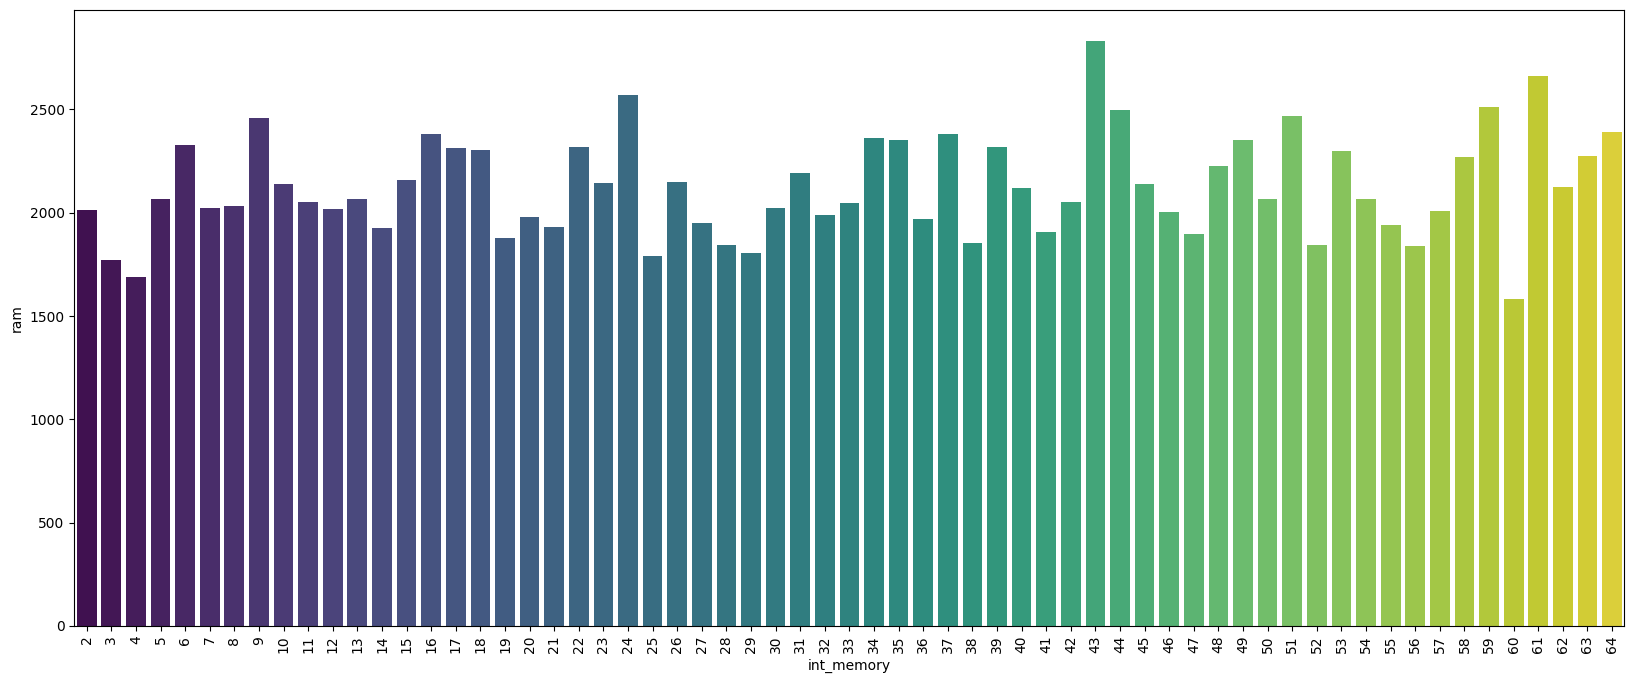

In [ ]:
plt.figure(figsize = (20, 8))
sns.barplot(data=df,x="int_memory",y="ram", palette = 'viridis', ci = False)
plt.xticks(rotation = 90)

#Having more internal memory doesn’t necessarily mean the phone has more RAM.
#the highest average RAM size doesn’t always match the highest internal memory.

<Axes: xlabel='price_range', ylabel='int_memory'>

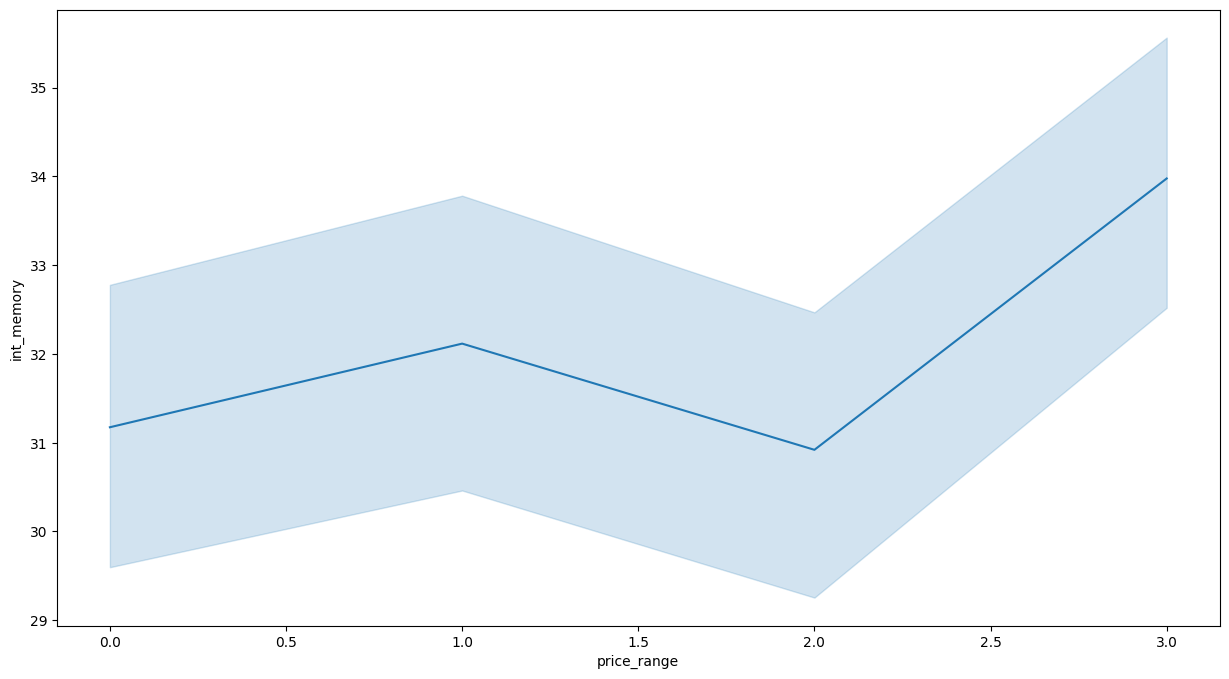

In [ ]:
plt.figure(figsize = (15, 8))
sns.lineplot(data=df,x="price_range",y="int_memory", palette = 'mako')

#from price range 0 to 1, memory size increases slightly.
#from range 1 to 2, it actually decreases.
# for the most expensive range, there’s a sharp jump in memory size.

## Kamere

<Axes: xlabel='has_pc', ylabel='count'>

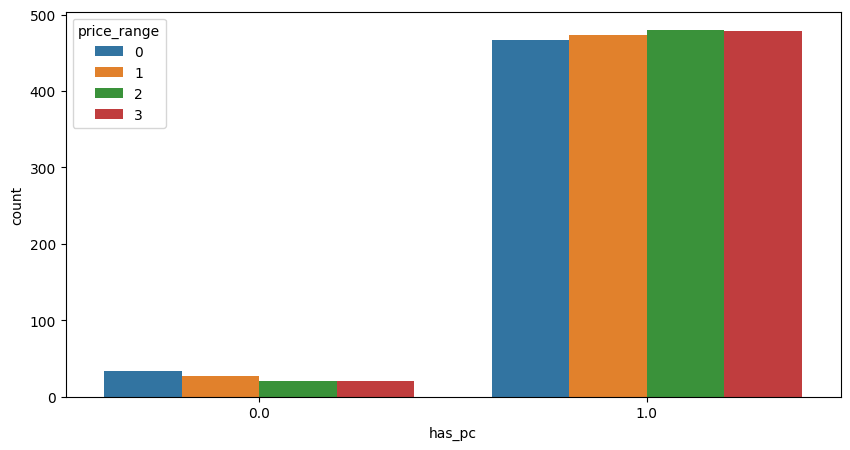

In [ ]:
plt.figure(figsize = (10, 5))

sns.countplot(data=df,x="has_pc", hue = df['price_range'],palette="tab10")

# Ne postoji mnogo telefona bez primarne kamere
# Vecina njih spada u najnizi cjenovni rang, sto ima smisla

<Axes: xlabel='has_pc', ylabel='ram'>

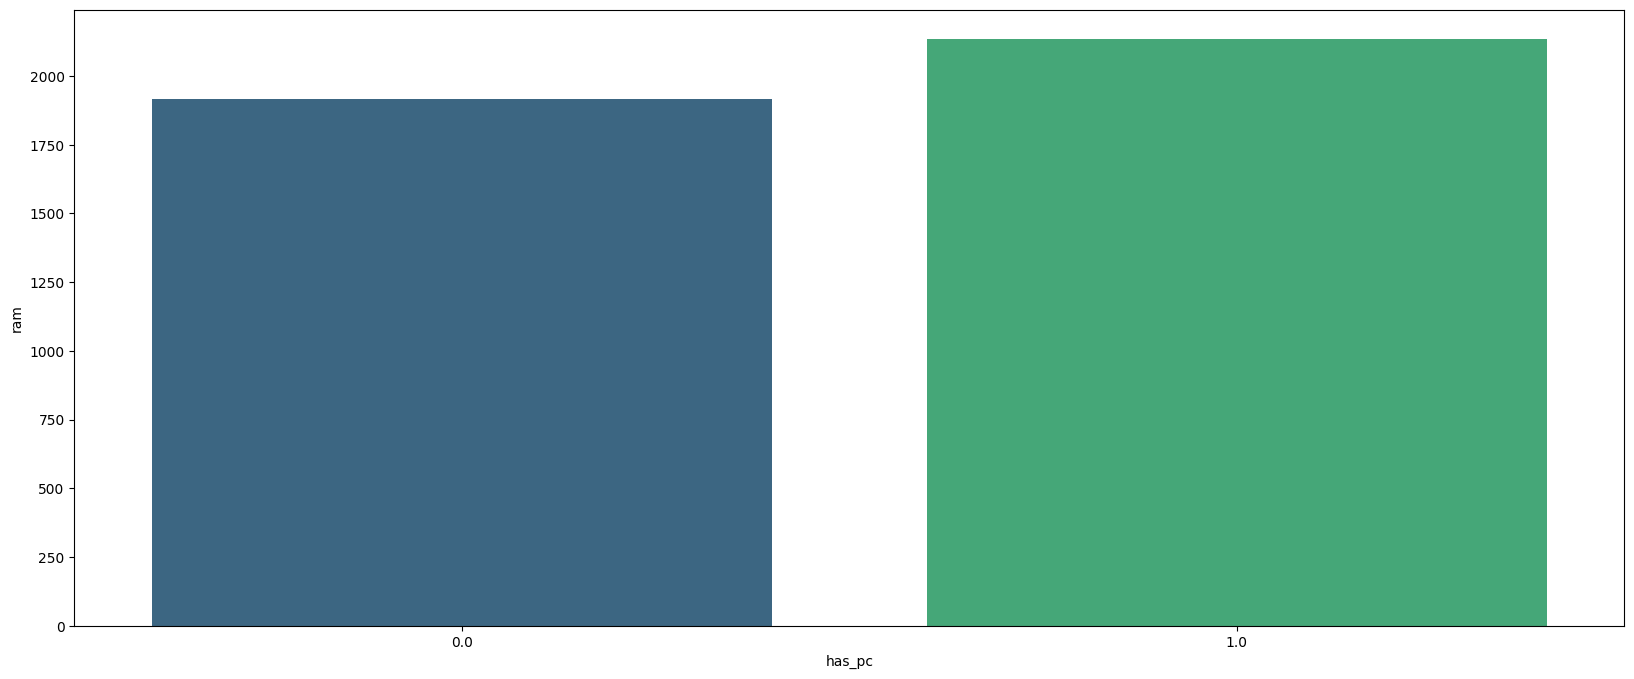

In [ ]:
plt.figure(figsize = (20, 8))
sns.barplot(data=df,x="has_pc",y="ram", palette = 'viridis', ci = False)

# Telefoni bez zadnje kamere obicno imaju manji prosjecni RAM.
# To je vjerovatno zato sto vecina njih spada cjenovni rang 0, koji u prosjeku vec ima manji RAM.

<Axes: xlabel='pc', ylabel='ram'>

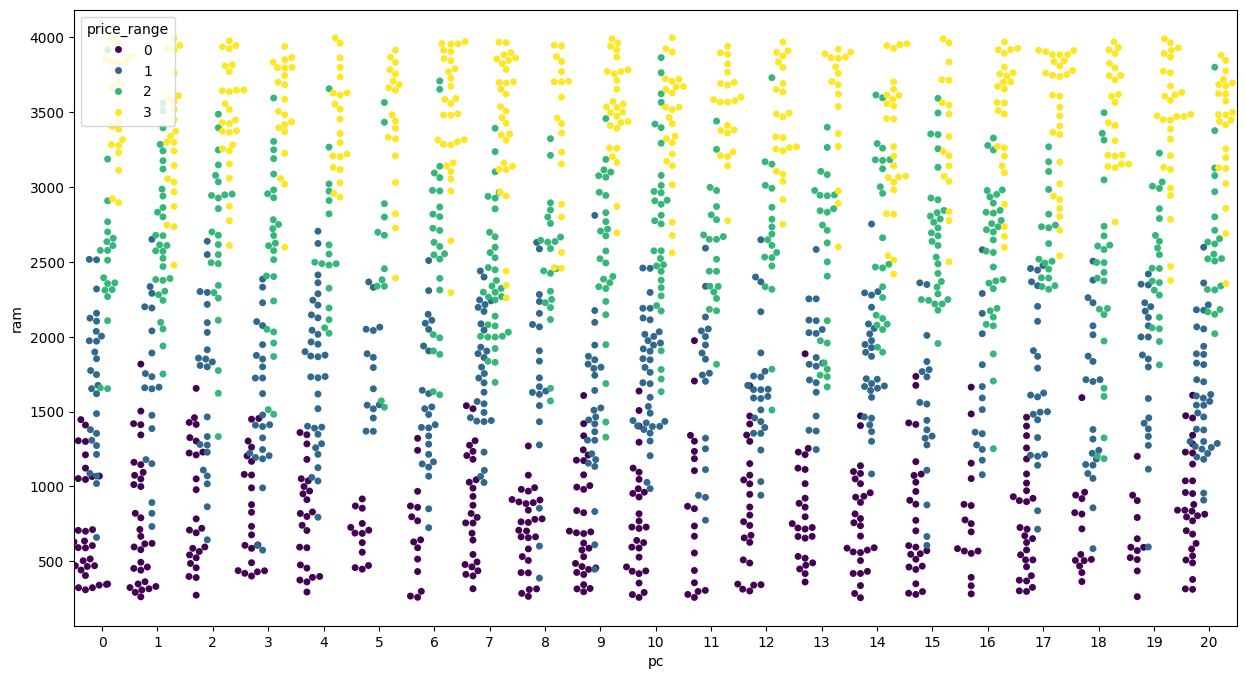

In [ ]:
plt.figure(figsize = (15, 8))
sns.swarmplot(data=df,x="pc",y="ram", hue = df['price_range'], palette = 'viridis', dodge = True)

<Axes: xlabel='price_range', ylabel='pc'>

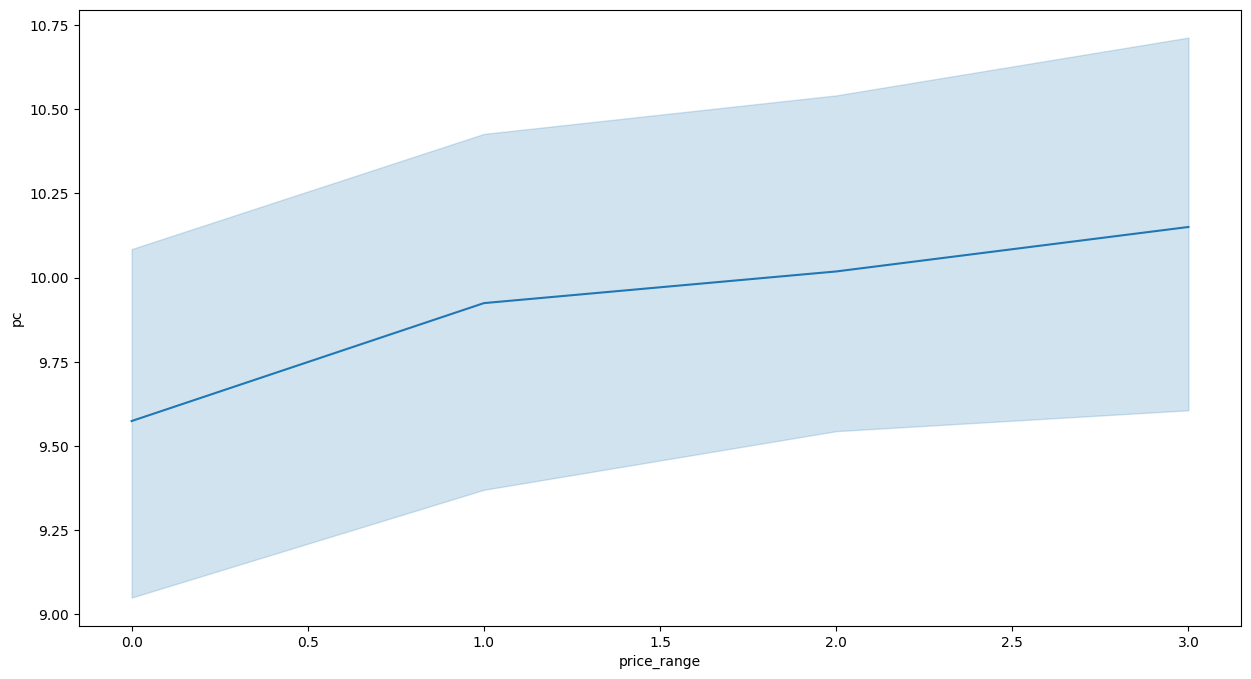

In [ ]:
plt.figure(figsize = (15, 8))
sns.lineplot(data=df,x="price_range",y="pc", palette = 'mako')

# Postoji blagi rast prosjecnih megapiksela glavne kamere kako raste cjenovni rang

<Axes: xlabel='has_fc', ylabel='count'>

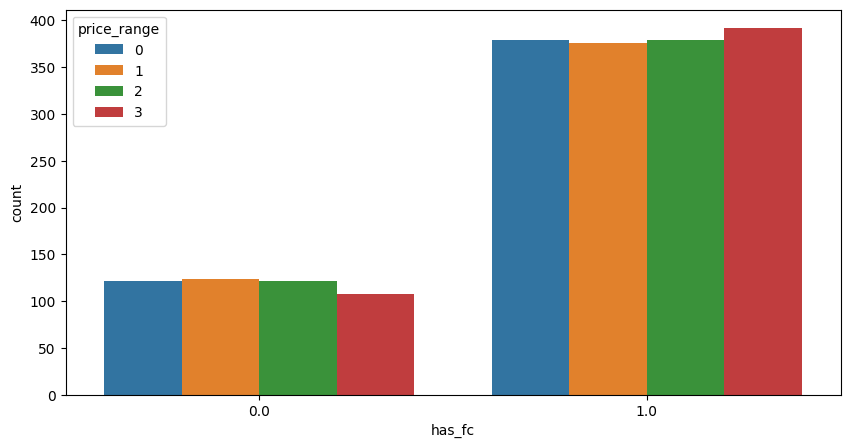

In [ ]:
plt.figure(figsize = (10, 5))

sns.countplot(data=df,x="has_fc", hue = df['price_range'],palette="tab10")

<Axes: xlabel='has_fc', ylabel='ram'>

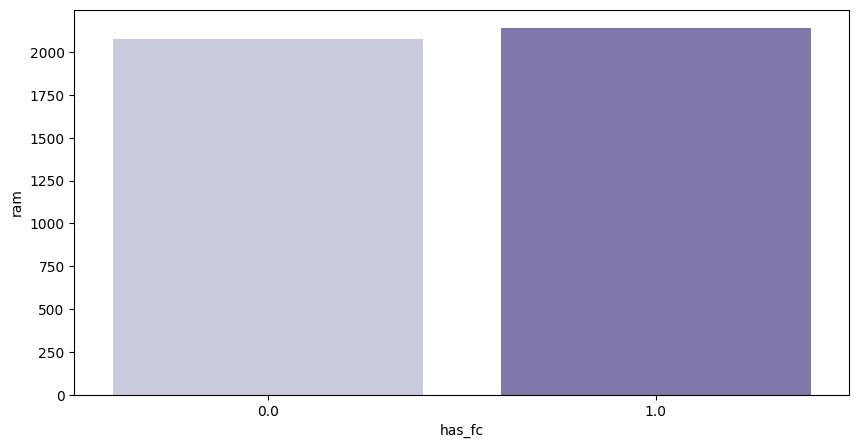

In [ ]:
plt.figure(figsize = (10, 5))

sns.barplot(data=df,x="has_fc",y="ram", ci = False, palette = 'Purples')


<Axes: xlabel='price_range', ylabel='fc'>

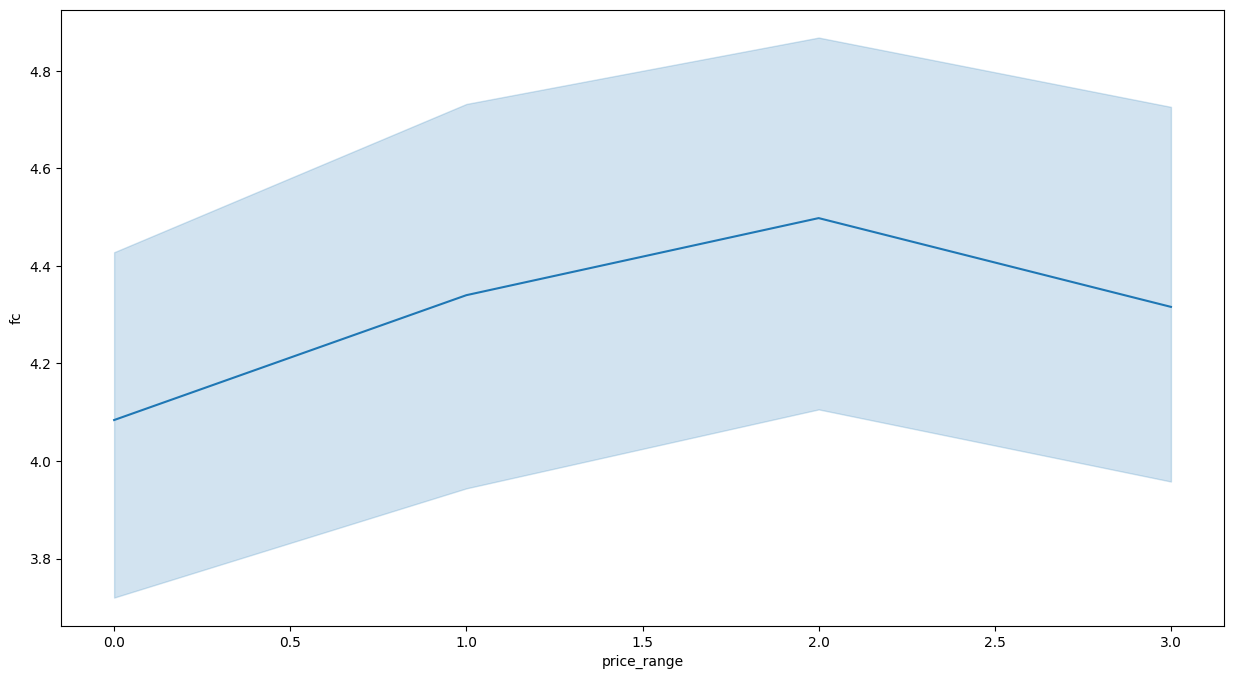

In [ ]:
plt.figure(figsize = (15, 8))
sns.lineplot(data=df,x="price_range",y="fc", palette = 'mako')

# Velicina prednje kamere uglavnom raste sa cjenovnim rangom,
# ali prosjek blago opada ranga 2 i 3.

## Ekran

Text(0.5, 1.0, 'Correlation between pixel width and height')

<Figure size 1000x500 with 0 Axes>

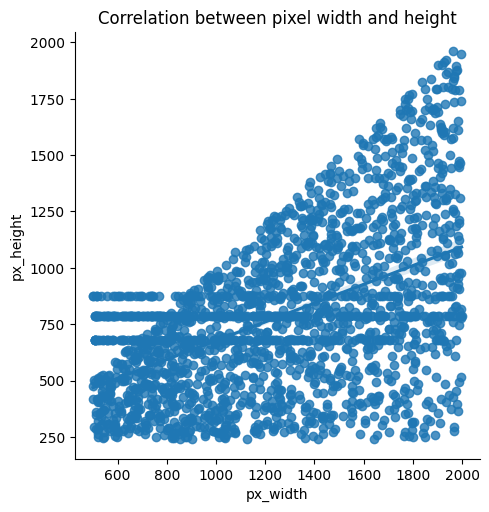

In [ ]:
plt.figure(figsize = (10, 5))
sns.lmplot(data=df,x ='px_width', y ='px_height')
plt.title('Correlation between pixel width and height')


# Sirina i visina piksela su pozitivno korelisane

<Axes: xlabel='price_range', ylabel='px_width'>

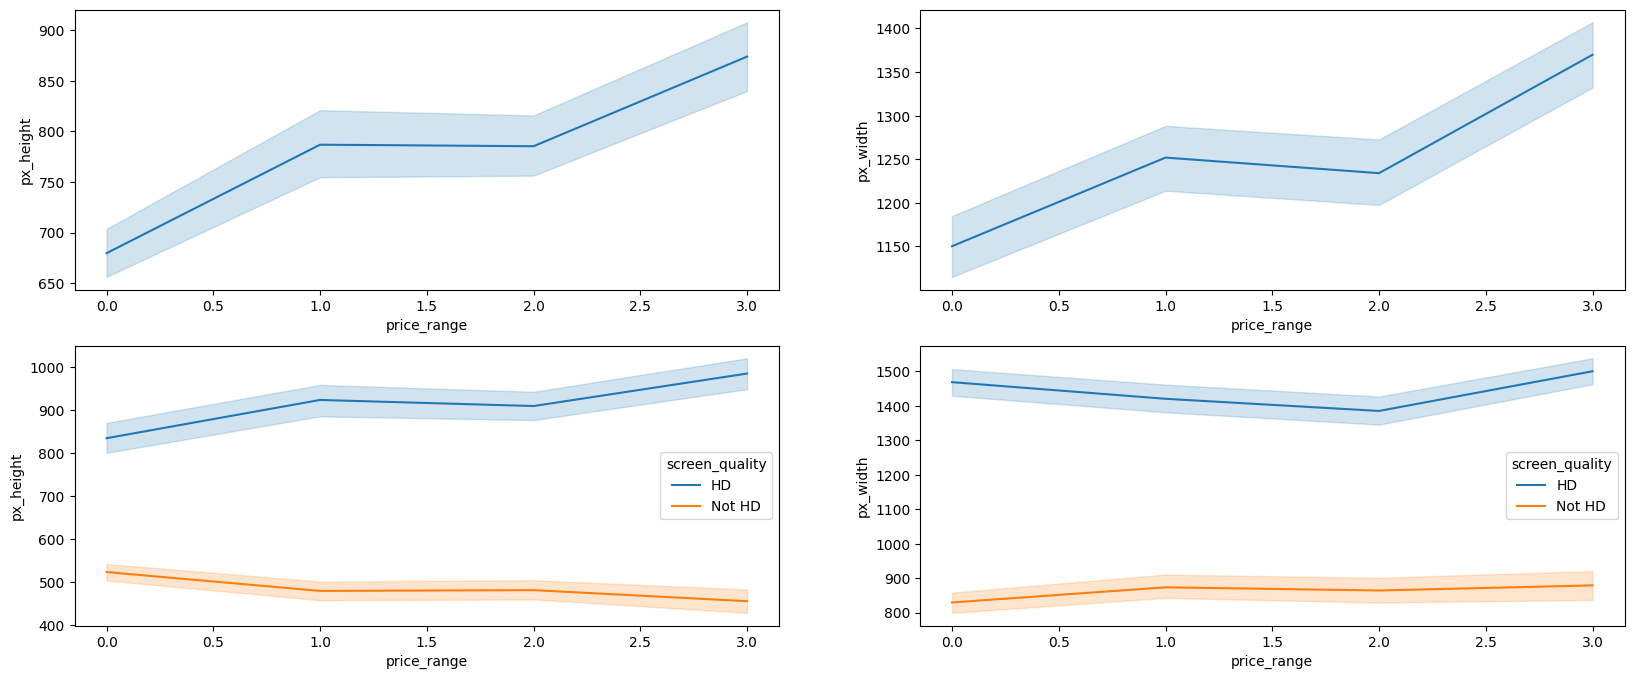

In [ ]:
plt.figure(figsize = (20, 8))

plt.subplot(2,2,1)
sns.lineplot(data = df,x ='price_range', y ='px_height')
plt.subplot(2,2,2)
sns.lineplot(data = df,x ='price_range', y ='px_width')
plt.subplot(2,2,3)
sns.lineplot(data = df,x ='price_range', y ='px_height', hue= 'screen_quality')
plt.subplot(2,2,4)
sns.lineplot(data = df,x ='price_range', y ='px_width', hue = 'screen_quality')

# Sirina i visina u pikselima uglavnom raste sa cijenom,
# sto znaci da telefoni sa skupljim ekranima obicno imaju bolji kvalitet istog.
# Medjutim, kod ne-HD ekrana velicina u pikselima ostaje priblizno ista u svim cjenovnim rangovima

<Axes: xlabel='price_range', ylabel='screen_size'>

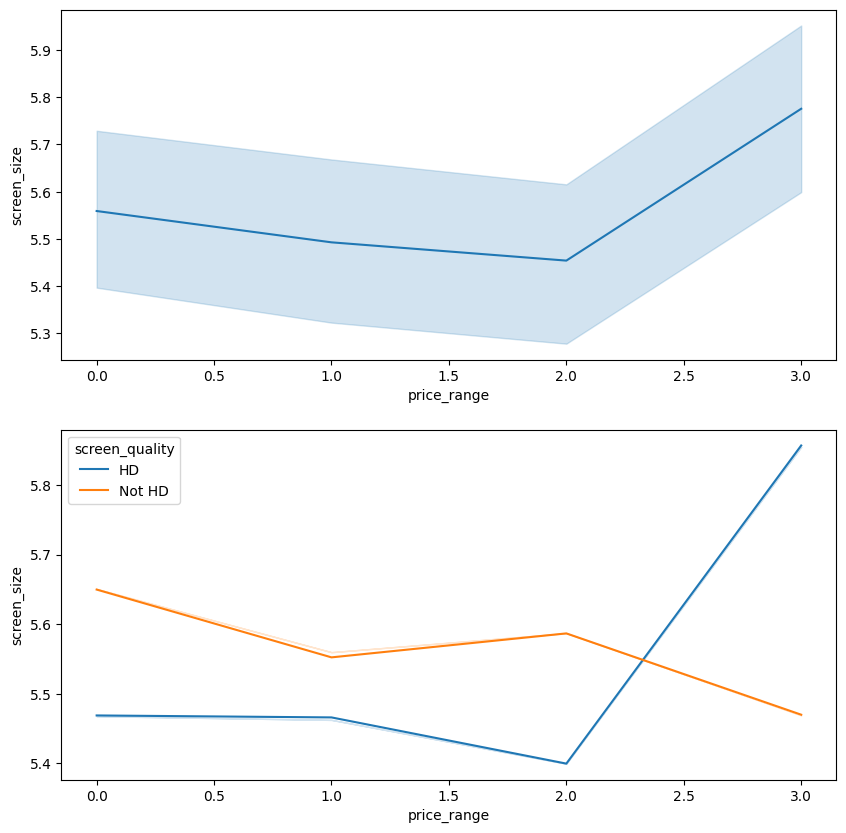

In [ ]:
### screen size

plt.figure(figsize = (10, 10))
plt.subplot(2,1,1)
sns.lineplot(x ='price_range', y ='screen_size', data = df)
plt.subplot(2,1,2)
sns.lineplot(x ='price_range', y ='screen_size', hue = 'screen_quality', data = df, ci = False)

# Od cjenovnog ranga 0 do 2, velicina ekrana uglavnom opada, ali za rang 3 raste
# Razdvajajuci po tipu ekrana:
# - HD ekrani su u prosjeku veci za najvisi cjenovni rang
# - Ne-HD ekrani variraju

In [ ]:
df.to_csv("train_clean.csv")

# Zakljucak

* Iz nase analize vidimo da osobine koje najvise uticu na raspon cijena su:

  1. **RAM** – telefoni u vecim cjenovnim rangovima imaju vise RAM-a. Takodje, kako raste cijena, tako raste i minimalna velicina **RAM-a**.

  2. **Kapacitet baterije** – za sve raspone cijena najmanja baterija je oko 500 mAh, a najveci kapacitet oko 2000 mAh. Prosjecni **kapacitet baterije** raste sa porastom cijene. Skupi telefoni imaju raspodjelu kapaciteta baterije blago pomjerenu ulijevo, dok je kod jeftinijih telefona raspodjela vise pomjerena udesno.

  3. **Visina i sirina piksela** igraju veliku ulogu u kvalitetu ekrana i pri odredjivanju cjenovnog ranga. Za sirinu piksela, skuplji telefoni uglavnom imaju vecu sirinu. Medjutim, raspodjela sirine piksela je slicna za telefone u svim rasponima cijena.

* **Velicina ekrana i cjenovni rang**

Velicina ekrana nema jak uticaj na **cijenu telefona**. U rasponima cijena 0 do 2, prosjecna velicina ekrana ostaje priblizno ista, izmedju **5.55** i **5.6** inca. Medjutim, z **cjenovni rang 3** dolazi do blagog povecanja, sa prosjekom oko **5.7** inca.

**HD ekrani**

Telefoni sa **HD** ekranima prate slican trend. Za raspon cijena 0 do 2, **HD** telefoni imaju neznatno manju prosjecnu velicinu ekrana u odnosu na ostatak. Nasuprot tome, HD telefoni u rasponu cijena 3 imaju prosjecnu velicinu ekrana oko **5.8** inca, blago iznad ukupnog prosjeka.

**Ne-HD ekrani**

Za telefone bez HD ekrana, trend je obrnut. Kako raste cjenovni rang, prosjecna velicina ekrana opada. Najveca prosjecna velicina ekrana za ne-HD telefone je za **cjenovni rang 0** (oko **5.65** inca), dok je **najmanja** za **cjenovni rang 3** (oko **5.5** inca).

* **Megapikseli kamere i cjenovni rang**

Kod **primarne (zadnje) kamere**, postoji jasna pozitivna korelacija izmedju broja megapiksela i cijene. Telefoini u cjenovnim rangovima obicno imaju veci prosjecan broj megapiksela.

Nasuprot tome, kod **prednje (selfie) kamere** nema konzistentne veze izmedju broja megapiksela i cijene. Velicina megapiksela prednjih kamera ostaje relativno stabilna kroz sve raspone cijena.
